# Introduction

Superstore is a fictional retail business located in the United States which sells Office Supplies, Furniture, and Technology Products. Their customers are the mass Consumer, Corporate and Home Offices. This business has been running from 03 January 2018. They want to analyze and assess their business performance from early 2018 to the end of 2021 such as identifying the customer segments and the purchasing patterns of customers.

*Note: the picture is for reference only*
<img src="image/superstore.jpg" width="600">

## Objective

- To get some insights about Superstore's market performance and main driver of loss in Superstore.
- To identify and understand customer segments in Superstore.
- To identify and understand purchasing patterns of customers in Superstore.

## Business  value

- We could identify opportunities for Superstore to boost business growth.
- We could treat each customer differently according to their segments. (reducing the risk and increasing the efficiency in deciding marketing strategy deployment in Superstore).
- We could help product development team to develop a product and to create product differentiation based on history of product purchases.

## Methodology

- Exploratory Data Analysis.
- Customer segmentation using clustering algorithm i.e. K-Means, Gaussian Mixture Model, and Hierarchical Clustering.
- Market basket analysis using apriori algorithm.

## The dataset

The dataset is obtained from [Kaggle](https://www.kaggle.com/datasets/sirajahmad/superstore) and also provided in [Tableau community](https://community.tableau.com/s/question/0D54T00000CWeX8SAL/sample-superstore-sales-excelxls). The timestamps are from **03 January 2018** to **30 December 2021**. This dataset only contains sales information in United States but if you want more granular sales across different country, There are also Global Superstore dataset (click [here](https://www.kaggle.com/datasets/gauravtopre/global-superstore-dataset)) which provides more granular Superstore's sales across different country (but the timestamps are different).

There will be one file after downloading the dataset, that is `Sample - Superstore.xls` which contains sheet about the orders (`Orders` sheet name), the regional manager each region (`People` sheet name), and the returned product (`Returns` sheet name).

Data description for `Orders`:
- `Row ID` &rarr; Unique ID for each row.
- `Order ID` &rarr; Unique Order ID for each Customer.
- `Order Date` &rarr; Order Date of the product.
- `Ship Date` &rarr; Shipping Date of the Product.
- `Ship Mode` &rarr; Shipping Mode specified by the Customer.
- `Customer ID` &rarr; Unique ID to identify each Customer.
- `Customer Name` &rarr; Name of the Customer.
- `Segment` &rarr; The segment where the Customer belongs.
- `Country/Region` &rarr; Country of residence of the Customer.
- `City` &rarr; City of residence of the Customer.
- `State` &rarr; State of residence of the Customer.
- `Postal Code` &rarr; Postal Code of every Customer.
- `Region` &rarr; Region where the Customer belongs.
- `Product ID` &rarr; Unique ID of the Product.
- `Category` &rarr; Category of the Product.
- `Sub-Category` &rarr; Sub-Category of the Product.
- `Product Name` &rarr; Name of the Product.
- `Sales` &rarr; Total Sales of the Product.
- `Quantity` &rarr; Quantity of the Product.
- `Discount` &rarr; Discount provided.
- `Profit` &rarr; Profit/Loss incurred (profit = positive value & loss = negative value).

Data description for `Returns`:
- `Returned` &rarr; If the Order has been returned.
- `Order ID` &rarr; Unique Order ID for each Customer.

Data description for `People`:
- `Regional Manager` &rarr; Name of the Regional Manager.
- `Region` &rarr; Region where the Customer belongs.

# Load the dataset

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import datetime as dt
import datetime

In [2]:
# load the dataset
orders = pd.read_excel('dataset/Sample - Superstore.xls', sheet_name = 'Orders')
people = pd.read_excel('dataset/Sample - Superstore.xls', sheet_name = 'People')
returns = pd.read_excel('dataset/Sample - Superstore.xls', sheet_name = 'Returns')
people = people.drop_duplicates()
returns = returns.drop_duplicates()

In [3]:
# merge the orders with people and returns
superstore = orders.merge(returns, how = 'left', on = 'Order ID')
superstore = superstore.merge(people, how = 'left', on = 'Region')
superstore

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Regional Manager
0,1,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,NaN,Fred Suzuki
1,2,CA-2020-152156,2020-11-08,2020-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,NaN,Fred Suzuki
2,3,CA-2020-138688,2020-06-12,2020-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,NaN,Sadie Pawthorne
3,4,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,NaN,Fred Suzuki
4,5,US-2019-108966,2019-10-11,2019-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,NaN,Fred Suzuki
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2018-110422,2018-01-21,2018-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180.0,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,NaN,Fred Suzuki
9990,9991,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,Yes,Sadie Pawthorne
9991,9992,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,Yes,Sadie Pawthorne
9992,9993,CA-2021-121258,2021-02-26,2021-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627.0,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,Yes,Sadie Pawthorne


# Data cleaning

## Check the dataset structure

- There are missing values in `Postal Code` and `Returned`.
- Missing values in `Returned` can be replaced by `"No"` string since it represents someone who doesn't return the order.
- Missing values in `Postal Code` can be replace by `"05401"`string since it is related to `"Vermont"` `State`.
- `Postal Code` and `Row ID` data types should be replace by `object` data type.
- There are no duplicate rows since `Row ID` values have unique values.

In [4]:
def check_df(df):
    df = pd.DataFrame({'column_name':list(df.columns),
                       'total_data':df.shape[0],
                       'null_value':list(df.isnull().sum()),
                       'proportion_null_value':list((df.isnull().sum()/df.shape[0]*100).round(2)),
                       'NaN_values':[len(df[df[column].isin(['nan', 'NaN', np.nan])]) > 0 for column in df.columns],
                       'dtype':list(df.dtypes.values),
                       'nunique':list(df.nunique(dropna = False)),
                       'most_frequent_name':[df[column].value_counts(dropna = False).sort_values(ascending = False).index[0] for column in df.columns],
                       'most_frequent_value':[df[column].value_counts(dropna=False).sort_values(ascending = False).values[0] for column in df.columns]})
    return df.set_index('column_name')

In [5]:
check_df(superstore)

,total_data,null_value,proportion_null_value,NaN_values,dtype,nunique,most_frequent_name,most_frequent_value
column_name,,,,,,,,
Row ID,9994,0,0.00,False,int64,9994,2049,1
Order ID,9994,0,0.00,False,object,5009,CA-2021-100111,14
Order Date,9994,0,0.00,False,datetime64[ns],1236,2020-09-05 00:00:00,38
Ship Date,9994,0,0.00,False,datetime64[ns],1334,2019-12-16 00:00:00,35
Ship Mode,9994,0,0.00,False,object,4,Standard Class,5968
Customer ID,9994,0,0.00,False,object,793,WB-21850,37
Customer Name,9994,0,0.00,False,object,793,William Brown,37
Segment,9994,0,0.00,False,object,3,Consumer,5191
Country/Region,9994,0,0.00,False,object,1,United States,9994


## Change data types

In [6]:
# change to object data type
superstore['Row ID'] = superstore['Row ID'].astype('object')
superstore['Postal Code'] = superstore['Postal Code'].astype('object')

## Replace missing values

In [7]:
# replace missing values in 'Returned'
superstore['Returned'] = superstore['Returned'].replace({np.nan:'No'})

# replace missing values in 'Postal Code'
superstore['Postal Code'] = superstore['Postal Code'].replace({np.nan:'05401.0'})

## Check duplicates

In [8]:
# check duplicate rows
superstore[superstore.duplicated()]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Returned,Regional Manager


# Exploratory Data Analysis (EDA)

## Data understanding

### Statistical summary

- Negative `Profit` means loss.
- Seems like `Sales` have an outlier (max value up to `22638.480000`) but after checking the dataset for the sales at `22638.480000` is still reasonable (6 units of `"Cisco TelePresence System EX90 Videoconferencing Unit"` where the price of each unit is `3773.08`).

In [9]:
# take important column names for analysis
categorical = [col for col in superstore.columns if superstore[col].dtype == 'object']
numerical = [col for col in superstore.columns if (superstore[col].dtype != 'object') and (superstore[col].dtype != '<M8[ns]')]

In [10]:
display(superstore[numerical].describe())
display(superstore[categorical].describe())

,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000
mean,229.858001,3.789574,0.156203,28.656896
std,623.245101,2.225110,0.206452,234.260108
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.280000,2.000000,0.000000,1.728750
50%,54.490000,3.000000,0.200000,8.666500
75%,209.940000,5.000000,0.200000,29.364000
max,22638.480000,14.000000,0.800000,8399.976000


,Row ID,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country/Region,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Returned,Regional Manager
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994.0,9994,9994,9994,9994,9994,9994,9994
unique,9994,5009,4,793,793,3,1,531,49,631.0,4,1862,3,17,1849,2,4
top,1,CA-2021-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,10035.0,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,No,Sadie Pawthorne
freq,1,14,5968,37,37,5191,9994,915,2001,263.0,3203,19,6026,1523,48,9194,3203


### Data distribution

Numerical columns:
- The outliers are still reasonable after checking the dataset.
- `Sales`: It seems like the most common market place value is less than 2000 USD.
- `Quantity`: 2 and 3 quantity are often to sold.
- `Discount`: 0.0 and 0.2 discount rates are commonly given by the Superstore.

Categorical columns:
- `Ship Mode`: Standard class ship mode is commonly used.
- `Segment`: Most of the buyers are consumer.
- `State`: California is where the most customers residence are.
- `Region` and `Regional Manager`: West (Sadie Pawthorne as Reg Manager) and East (Chuck Magee as Reg Manager) US are where the most customers residence are.
- `Category` and `Sub-Category`: Office Supplies (Binders and Paper) are the most often product to buy.
- `Returned`: there are not a lot of items returned in 4 years selling. (8% product returned in 4 years)

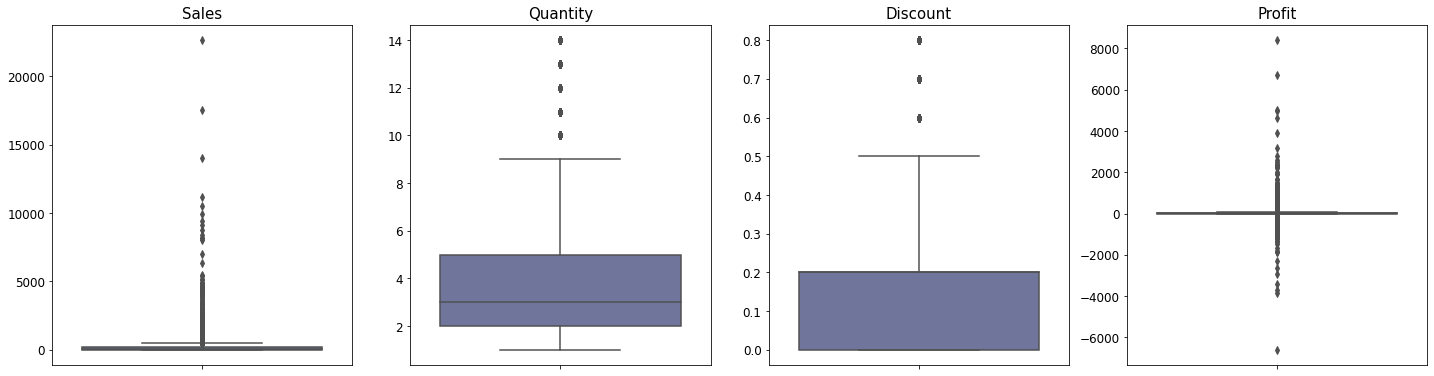

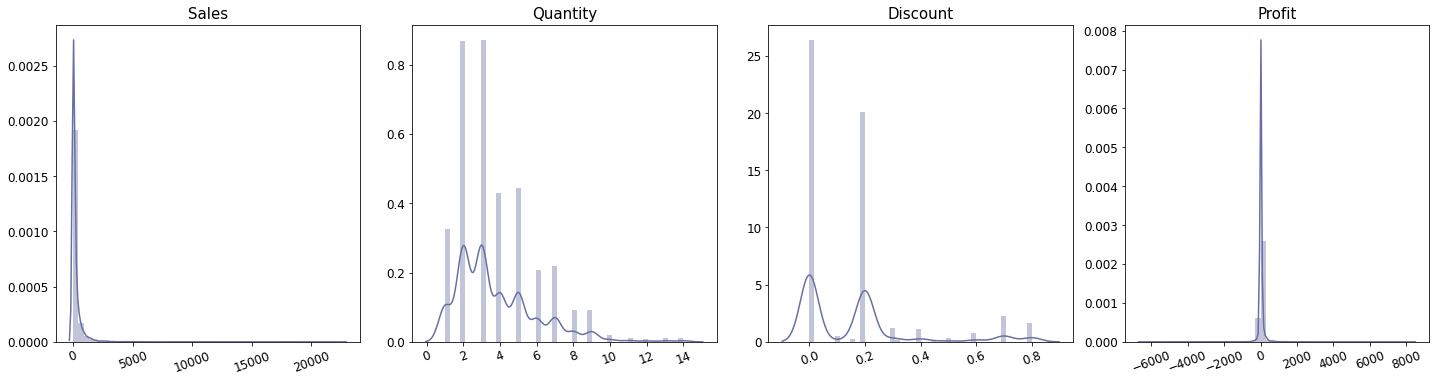

In [11]:
# numerical data
fig = plt.figure(figsize = (25, 25))
i = 1
for col in superstore[numerical].columns:
    plt.subplot(5, 5, i)
    ax = sns.boxplot(y = superstore[col], color ='#676FA3')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()


fig = plt.figure(figsize = (25, 25))
i = 1
for col in superstore[numerical].columns:
    plt.subplot(5, 5, i)
    ax = sns.distplot(x = superstore[col], color ='#676FA3')

    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 15)
    plt.xticks(rotation = 20, fontsize = 12)
    plt.yticks(fontsize = 12)
    plt.tight_layout()
    i += 1
plt.show()

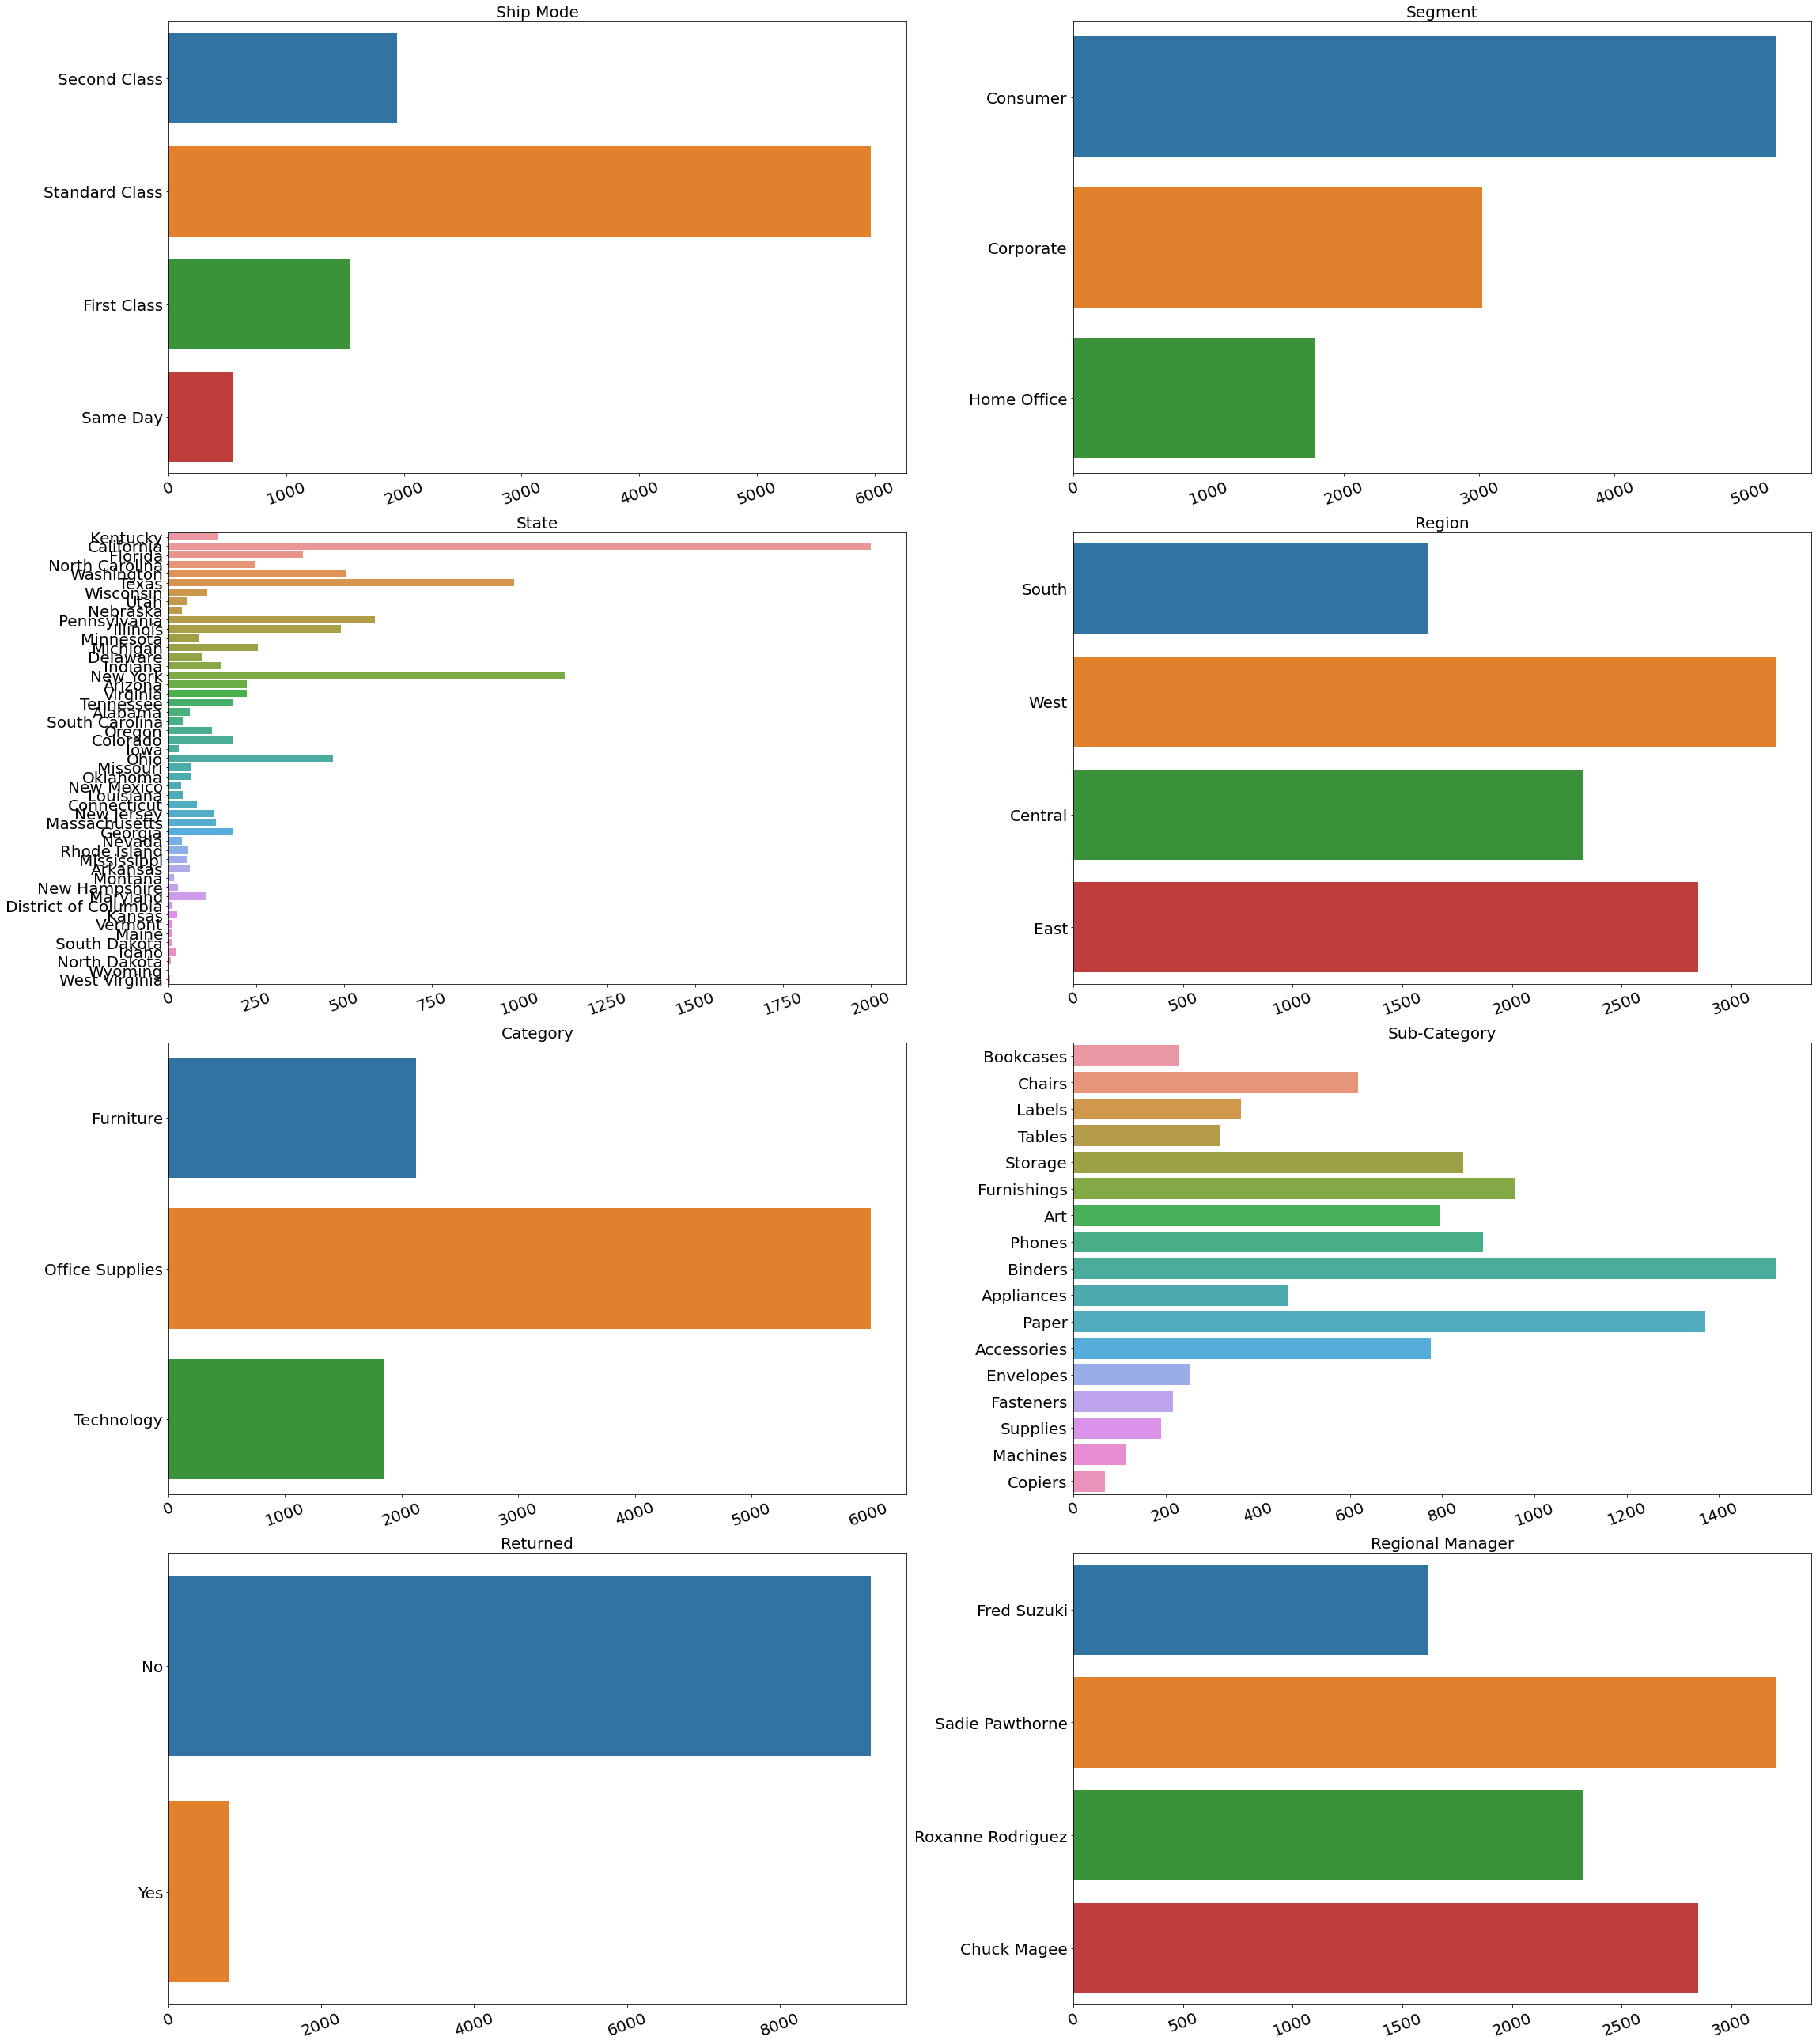

In [12]:
# categorical data
categorical = ['Ship Mode', 'Segment', 'State', 'Region', 'Category', 'Sub-Category', 'Returned', 'Regional Manager']

fig = plt.figure(figsize = (32, 36))
i = 1
for col in superstore[categorical].columns:
    plt.subplot(4, 2, i)
    ax = sns.countplot(data = superstore[categorical], y = superstore[col])
    
    ax.set(xlabel = None, ylabel = None)
    plt.title(str(col), loc = 'center', fontsize = 20)
    plt.xticks(rotation = 20, fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.tight_layout()
    i += 1

### Feature extraction

From the dataset we can extract some new features such as year, month, day, weekday/weekend of orders and shipping, unit price and etc.

In [13]:
# create unit price for each product
superstore['Unit Price'] = superstore['Sales']/superstore['Quantity']/(1- superstore['Discount'])

# extract year of order as continuous
superstore['Order Year Cont'] = superstore['Order Date'].apply(lambda x: dt.datetime(x.year, 1, 1 ))

# extract month of order as continuous
superstore['Order Month Cont'] = superstore['Order Date'].apply(lambda x: dt.datetime(x.year, x.month, 1 ))

# extract month of order as discrete
superstore['Order Year'] = superstore['Order Date'].dt.year

# extract month of order as discrete
superstore['Order Month'] = superstore['Order Date'].dt.month

# extract day of week of order
superstore['Order Day'] = superstore['Order Date'].dt.strftime('%A')
superstore['Order Day'] = pd.Categorical(superstore['Order Day'], categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# extract weekend or weekday of order
superstore['Order Weekend/Weekday'] = superstore['Order Date'].apply(lambda x: 'Weekend' if x.weekday() >= 5 else 'Weekday')

There is a useful information to be extracted such as the interval between ordering and shipping and this could be connected to `Ship Mode`. A new column called `Punctuality` is made with these criteria ([source](https://openclassrooms.com/en/courses/5873606-create-dashboards-with-tableau/exercises/3803)):
- `"Same Day"` &rarr; shipping on same day.
- `"First Class"` &rarr; shipping within 1 day.
- `"Second Class"` &rarr; shipping within 3 days
- `"Standard Class"` &rarr; shipping within 6 days.

In [14]:
def punctual_shipping(x):
    if x['Ship Mode'] == 'Same Day':
        if x['Interval Date'] == 0:
            return 'On Time'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'First Class':
        if x['Interval Date'] == 1:
            return 'On Time'
        elif x['Interval Date'] < 1:
            return 'Early'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'Second Class':
        if x['Interval Date'] == 3:
            return 'On Time'
        elif x['Interval Date'] < 3:
            return 'Early'
        else:
            return 'Late'
    elif x['Ship Mode'] == 'Standard Class':
        if x['Interval Date'] == 6:
            return 'On Time'
        elif x['Interval Date'] < 6:
            return 'Early'
        else:
            return 'Late'

In [15]:
# extract day intervals between ordering and shipping
superstore['Interval Date'] = (superstore['Ship Date'] - superstore['Order Date']).dt.days

# extract the punctuality of ship mode
superstore['Punctuality'] = superstore.apply(lambda x: punctual_shipping(x), axis = 1)

## Deep dive EDA

### KPIs across different features

Visualization will be performed with `total_profit` as primary KPI while the secondary KPIs are `total_trx`, `total_sales`, `total_quantity`, and `avg_discount` across different features.

In [16]:
# helper function
def KPIs_performance(groupby, suptitle_name, df, savefig, savefig_name, figure_size = (12, 10)):
    df = df.groupby(groupby).agg(total_trx = ('Row ID', 'count'),
                                 total_sales = ('Sales', 'sum'),
                                 total_quantity = ('Quantity', 'sum'),
                                 avg_discount = ('Discount', 'mean'),
                                 total_profit = ('Profit', 'sum')).reset_index()
    group = groupby[0]
    fig, ax = plt.subplots(figsize = figure_size, nrows = 2, ncols = 2)

    # total_trx
    df = df.sort_values('total_trx', ascending = False)
    ax1 = ax[0][0].twinx()
    sns.barplot(data = df, x = group, y = 'total_trx', 
                ax = ax[0][0], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax1, color = '#D7503C')
    ax1.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax1.axhline(y = 0, color = 'gray', linestyle = '--')
    ax1.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax1.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[0][0].set_ylabel('total_trx', color = '#440154', fontsize = 12)
    ax[0][0].tick_params(axis = 'y', labelcolor = '#440154')
    ax[0][0].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)
    
    # total_sales
    df = df.sort_values('total_sales', ascending = False)
    ax2 = ax[0][1].twinx()
    sns.barplot(data = df, x = group, y = 'total_sales', 
                ax = ax[0][1], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax2, color = '#D7503C')
    ax2.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax2.axhline(y = 0, color = 'gray', linestyle = '--')
    ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[0][1].set_ylabel('total_sales ($)', color = '#440154', fontsize = 12)
    ax[0][1].tick_params(axis = 'y', labelcolor = '#440154')
    ax[0][1].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)

    # total_quantity
    df = df.sort_values('total_quantity', ascending = False)
    ax3 = ax[1][0].twinx()
    sns.barplot(data = df, x = group, y = 'total_quantity', 
                ax = ax[1][0], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax3, color = '#D7503C')
    ax3.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax3.axhline(y = 0, color = 'gray', linestyle = '--')
    ax3.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax3.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[1][0].set_ylabel('total_quantity', color = '#440154', fontsize = 12)
    ax[1][0].tick_params(axis = 'y', labelcolor = '#440154')
    ax[1][0].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)
    
    # avg_discount
    df = df.sort_values('avg_discount', ascending = False)
    ax4 = ax[1][1].twinx()
    sns.barplot(data = df, x = group, y = 'avg_discount', 
                ax = ax[1][1], palette = 'viridis', order = df[group])
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax4, color = '#D7503C')
    ax4.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C')
    ax4.axhline(y = 0, color = 'gray', linestyle = '--')
    ax4.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax4.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[1][1].set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12)
    ax[1][1].tick_params(axis = 'y', labelcolor = '#440154')
    ax[1][1].set_xticklabels([label for label in df[group]], rotation = 30, ha = 'right', fontsize = 8)

    plt.tight_layout()
    plt.suptitle(t = suptitle_name, x = 0.5, y = 1.01)
    if savefig == True:
        plt.savefig(savefig_name, bbox_inches = 'tight')
    plt.show()
    return df

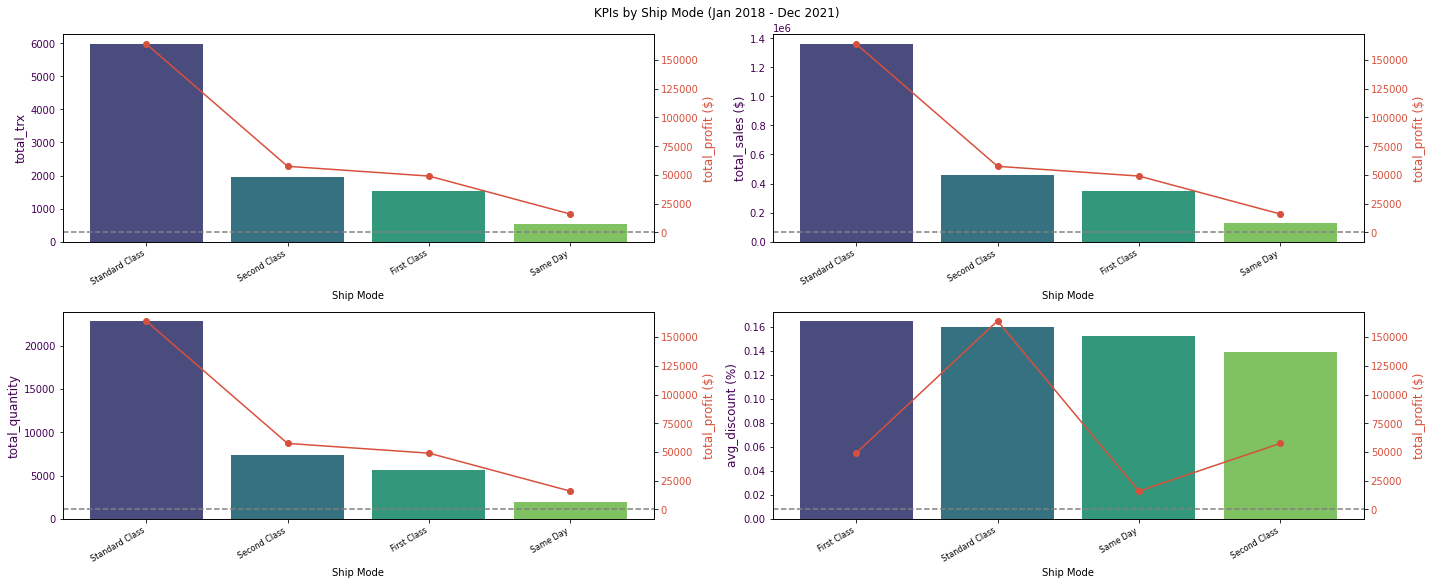

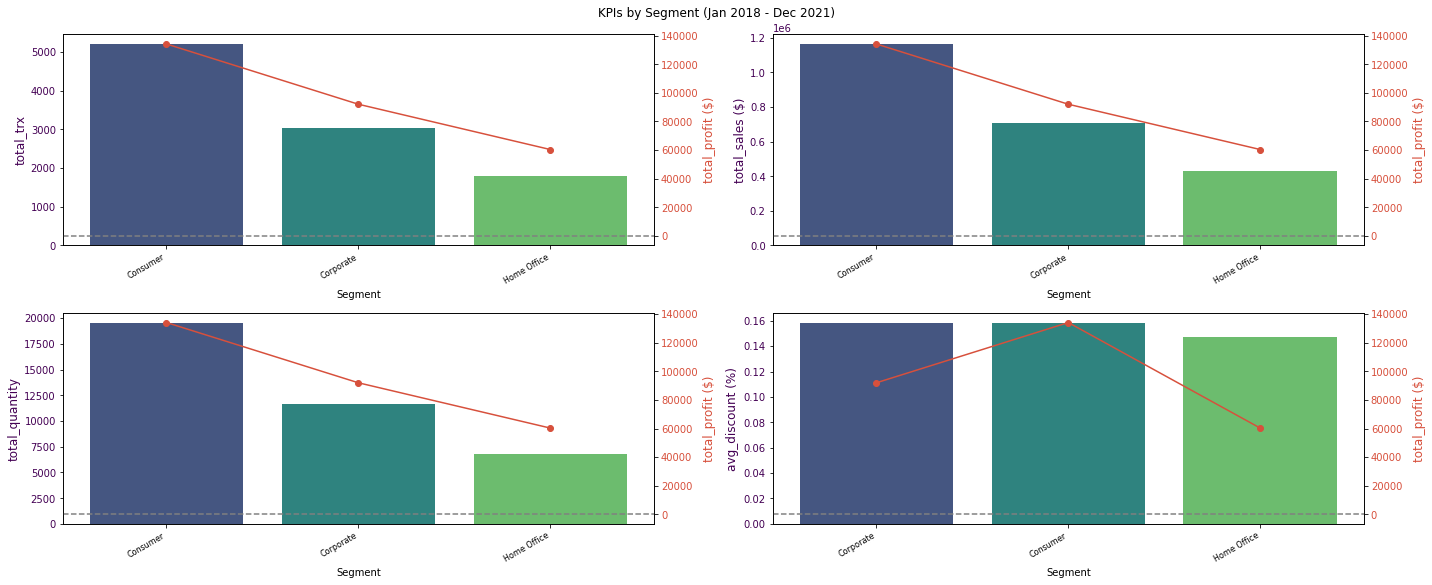

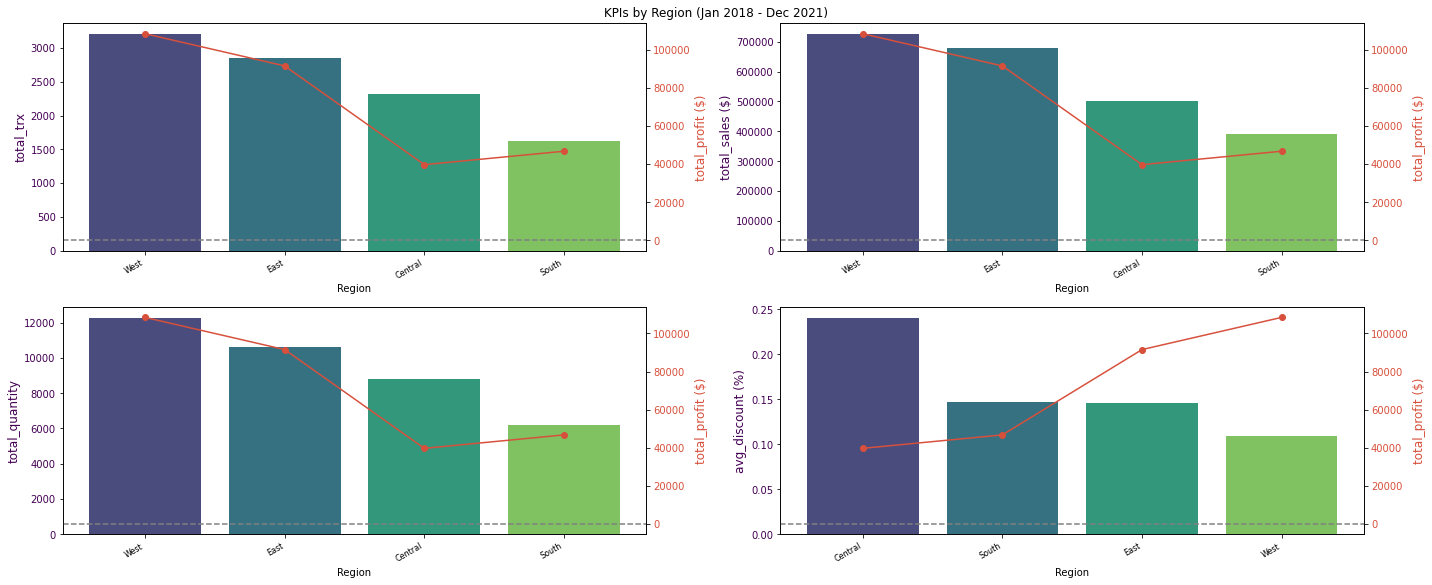

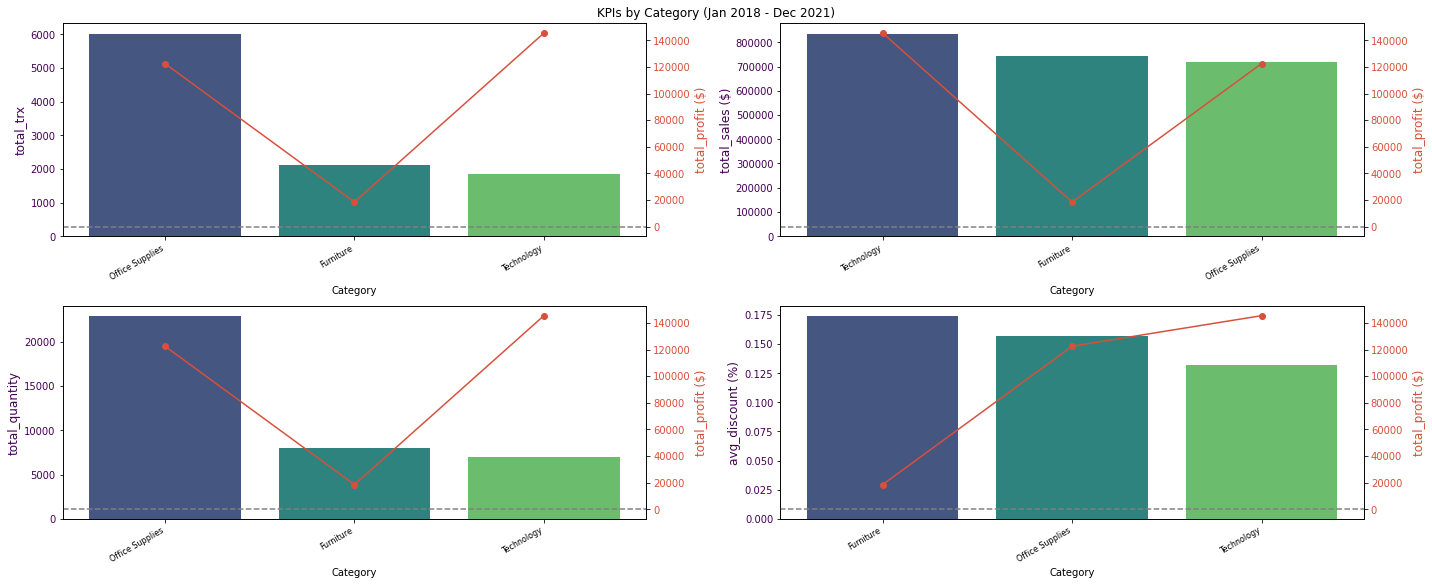

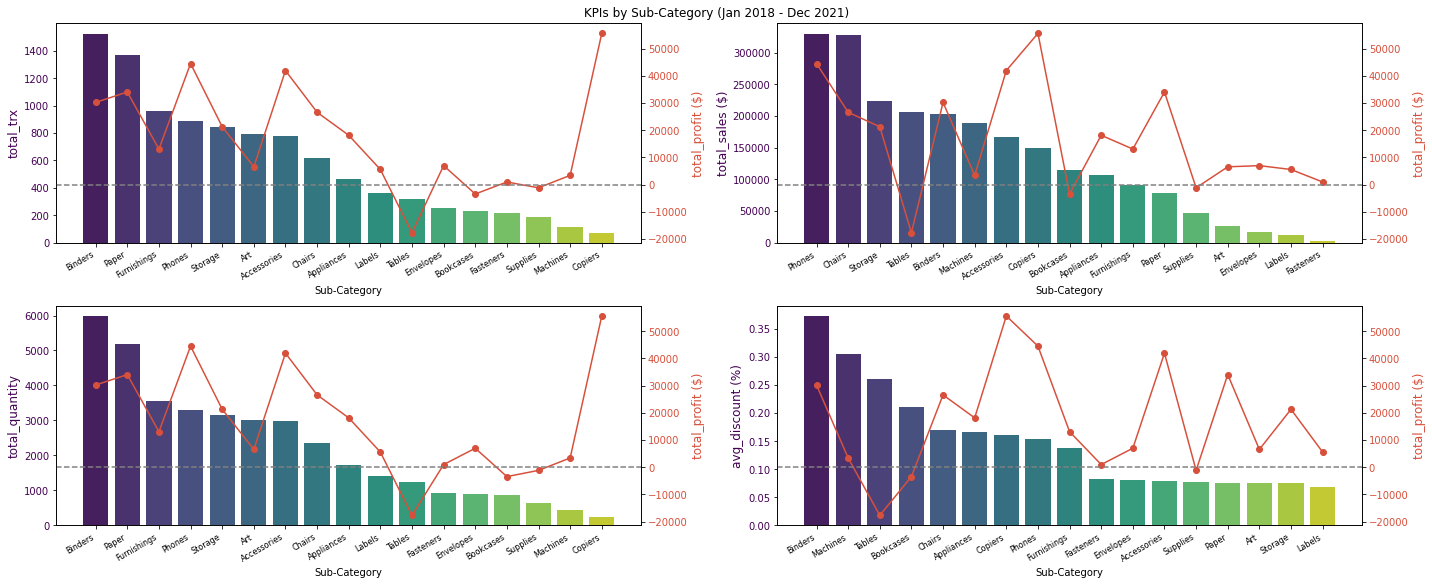

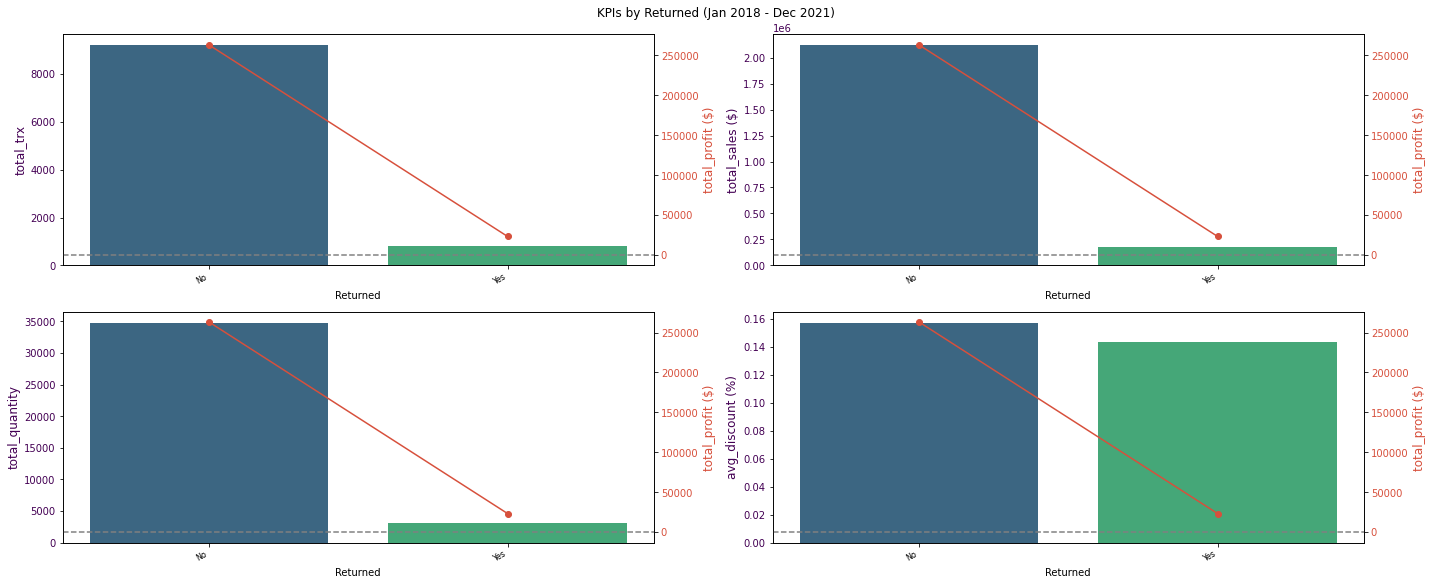

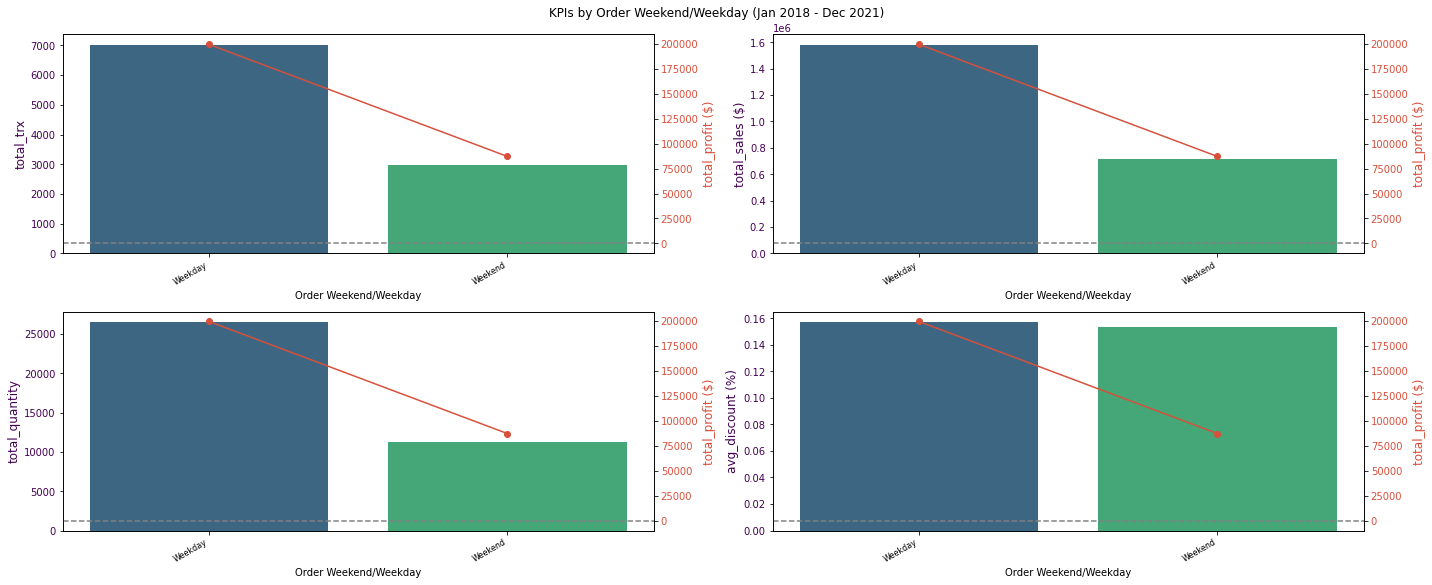

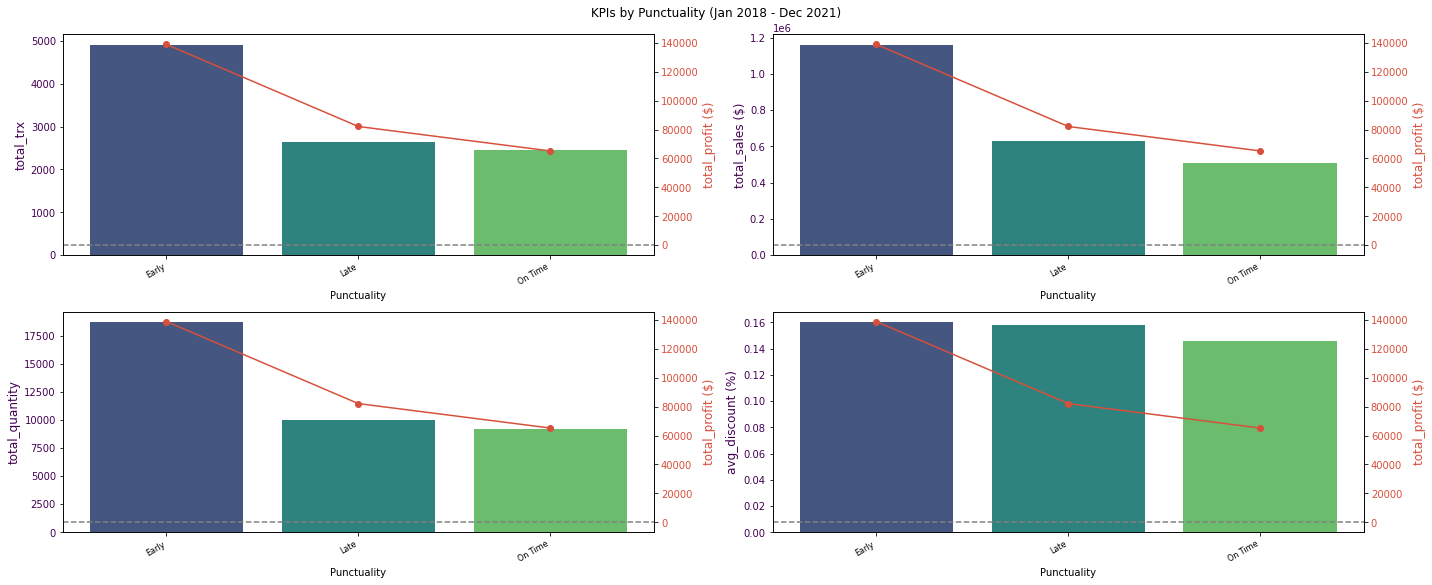

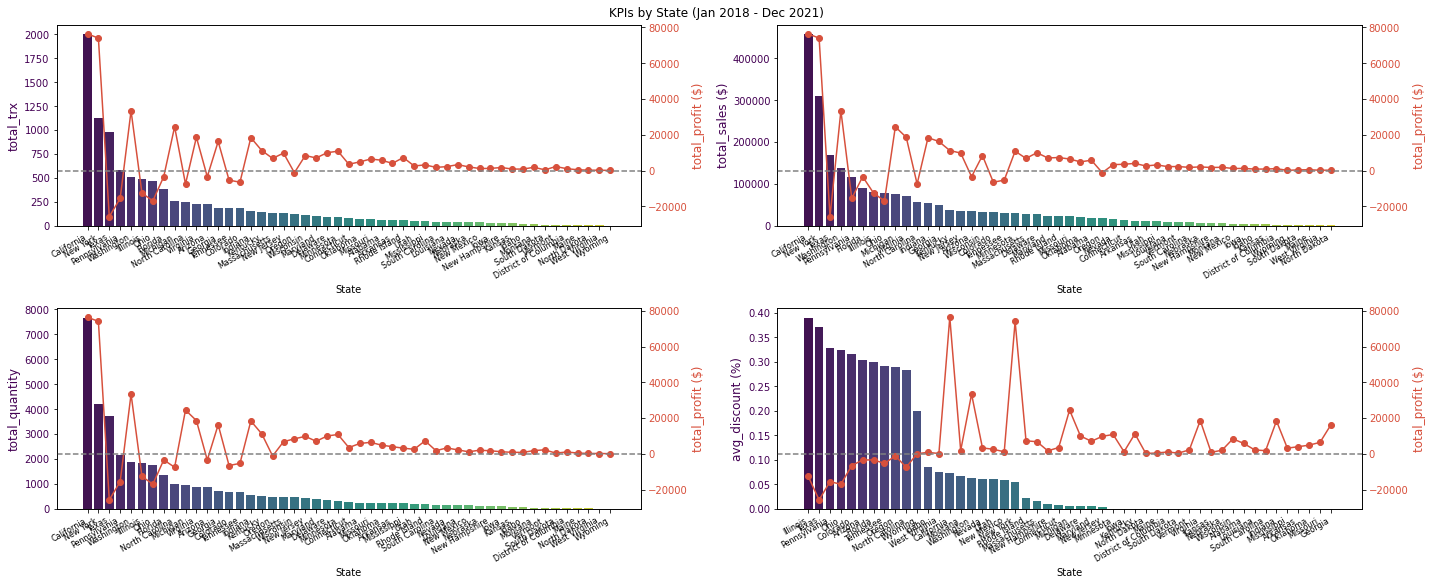

In [17]:
# features to analyze
features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 
            'Returned', 'Order Weekend/Weekday', 'Punctuality', 'State']
for feature in features:
    KPIs_performance([feature], 
                     suptitle_name = 'KPIs by {} (Jan 2018 - Dec 2021)'.format(feature), 
                     df = superstore, 
                     savefig = False, savefig_name = None, 
                     figure_size = (20, 8))
    print('='*100)

Insights:
- Generally, `total_quantity` & `total_trx` seem to have a high positive relationship where high transactions lead to high quantities and otherwise. This is understandable. 
- `total_quantity`/`total_trx` & `total_profit` and `total_sales` & `total_profit` have positive relationship too (high sales lead to high profits or high transactions lead to high profits), yet this is not always the case for `Category` and `Sub-Category` since these features are more granular (depend on the unit price of product).
- `Ship Mode`:
    - "Standard Class" is the preferred method of shipment and perhaps the cheapest one too. The other modes are not popular and may be too costly. Mostly, the high profit comes from "Standard Class". 
- `Segment`:
    - "Consumer" segment is the most profitable then followed by "Corporate" segment. The marketing strategy should always focus on retaining this two segment. The avg discount given for each segment is relatively even.
- `Region`: 
    - "West" and "East" region are the most profitable. This is due to most customers residence are from those two regions. Superstore has to focus in "West" and "East" region and need to develop more the market in "Central" and "South" region. Low profit in "Central" region is affected by high avg discount, Superstore should consider reviewing the marketing strategy on discount rates which resulted in low profit in "Central" region.
- `Category`: 
    - "Technology" is the most profitable category although it has least amount of transactions or quantities. This is because "Technology" products are usually not a daily purchased product (one-off purchase) and it's a long term products for years with high unit price. 
    - "Furniture" is the least profitable category, it may happen because the avg discount given is too high. 
    - "Office Supplies" is the second profitable category with highest demand. Superstore has to ensure their stock for "Office Supplies" category is always available over time.
- `Sub-Category`: 
    - Top 5 most profitable sub-category are "Copiers", "Phones", "Accessories", "Paper", and "Binders". The marketing strategy has to focus on marketing these products, especially for high demand products ("Paper" and "Binders"). These products are good for cross-selling or bundling them to increase the profit, sales, and demand on low performance sub-category such as "Bookcases".
    - Sub category such as "Tables", "Bookcases", and "Machines" are the loss-making sub-category (close to zero profit or negative profit) which have high avg discount and low total quantity. This might indicate the marketing strategy of giving high avg discount for a low demand product to increase the demand does not help much. Superstore should consider another marketing strategy or remove this product catalogue since it might not fit for the target market (also for "Fasteners" and "Supplies").
- `Returned`:
    - Returned orders are due to relatively low avg discount.
- `Order Weekend/Weekday`:
    - Most profit makes on the weekday and this is reasonable since weekday has 5 days. The avg discount relatively even between weekend and weekday.
- `Punctuality`:
    - Almost 50% of shipments is "Early" and this is good for increasing the customers satisfaction.
- `State`:
    - The KPIs is not even distributed.
    - California and New York are the most profitable states.

### Specific questions

#### What are top 10 products with the most number of transactions, sales, and  discount (and how is the total profit profile)?

- From the top 10 most number of transactions, we can see that Staple Envelope, Easy-Staple Paper, and Staples are having high amount of transactions compared to the other. The product development team can make product bundling based on this three product or apply cross-selling strategy to increase profit at low order products.
- From the top 10 total sales, we can see that high amount on total sale doesn't always lead to a profit but relatively lead to a profit. Most of the high amount of total sales come from `"Technology"` `Category`.
- From the top 10 avg discounts, we can see that high amount on discounts lead to a loss and dominantly come from `"Technology"` `Category`. The superstore manager have to be more careful and wise in determining the discount of a product especially high price products.

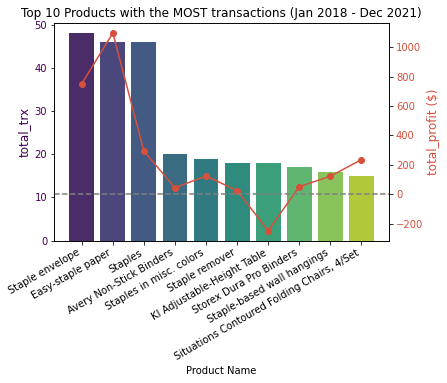

In [18]:
# top 10 products by the transactions
top_10_product = superstore.groupby(['Product Name']).agg(total_trx = ('Order ID','count'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_trx', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_product, x = 'Product Name', y = 'total_trx', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_product, x = 'Product Name', y = 'total_profit', ax = ax2, color = '#D7503C')
ax2.scatter(top_10_product['Product Name'], top_10_product['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_product['Product Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Product Name', fontsize = 10)
ax1.set_ylabel('total_trx', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Products with the MOST transactions (Jan 2018 - Dec 2021)')       # edit
plt.show()

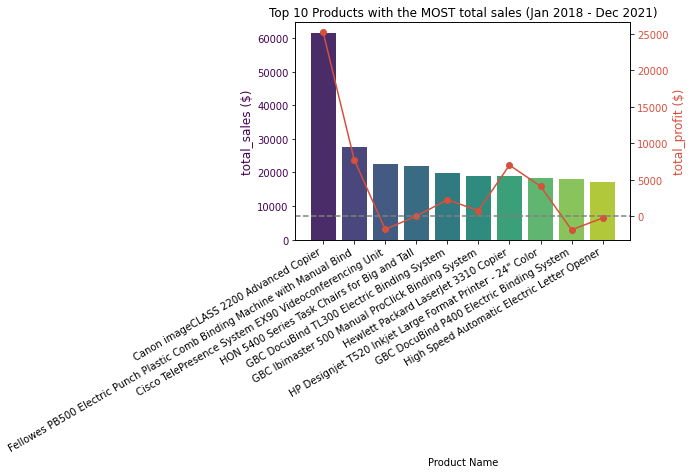

In [19]:
# top 10 products by the total sales
top_10_product = superstore.groupby(['Product Name']).agg(total_sales = ('Sales','sum'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_sales', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_product, x = 'Product Name', y = 'total_sales', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_product, x = 'Product Name', y = 'total_profit', ax = ax2, color = '#D7503C')
ax2.scatter(top_10_product['Product Name'], top_10_product['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_product['Product Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Product Name', fontsize = 10)            
ax1.set_ylabel('total_sales ($)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Products with the MOST total sales (Jan 2018 - Dec 2021)') # edit
plt.show()

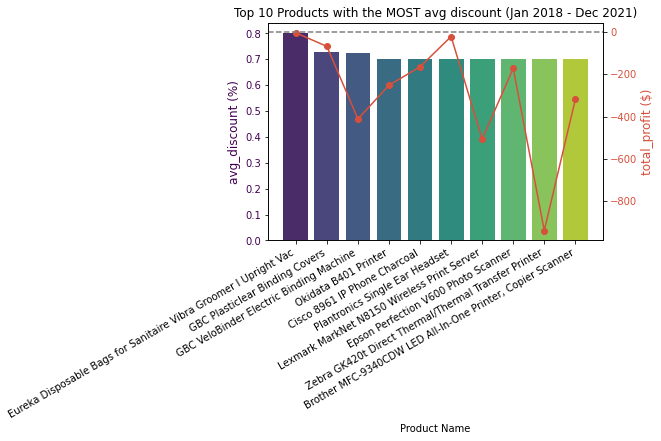

In [20]:
# top 10 products by the avg discount given
top_10_product = superstore.groupby(['Product Name']).agg(avg_discount = ('Discount','mean'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'avg_discount', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_product, x = 'Product Name', y = 'avg_discount', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_product, x = 'Product Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_product['Product Name'], top_10_product['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_product['Product Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Product Name', fontsize = 10)
ax1.set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Products with the MOST avg discount (Jan 2018 - Dec 2021)')                 # edit
plt.show()

#### Who are top 10 customers with the most number of transactions, money spent, and discount (and how is the total profit profile)?

- From the top 10 transactions of customers, the distribution relatively even and high transactions per customer tend to give a profit.
- From the top 10 money spend of customers, high spenders relatively give high profit.
- From the top 10 discounts, high discount given to a customers lead to a loss.

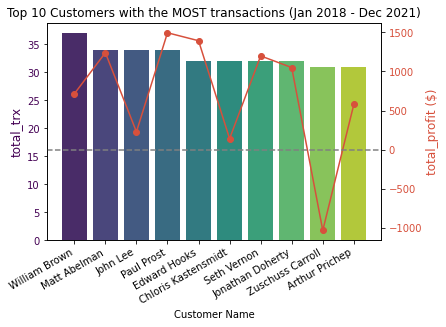

In [21]:
# top 10 customers by the transactions
top_10_customer = superstore.groupby(['Customer Name']).agg(total_trx = ('Order ID','count'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_trx', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_customer, x = 'Customer Name', y = 'total_trx', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_customer, x = 'Customer Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_customer['Customer Name'], top_10_customer['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_customer['Customer Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Customer Name', fontsize = 10)
ax1.set_ylabel('total_trx', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Customers with the MOST transactions (Jan 2018 - Dec 2021)')              # edit
plt.show()

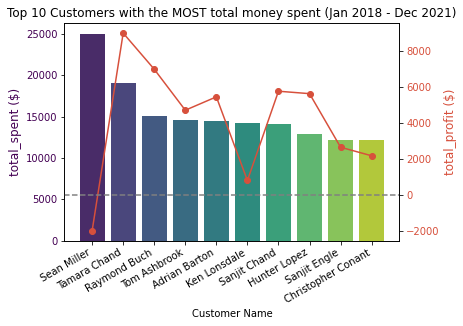

In [22]:
# top 10 customers by the total money spend
top_10_customer = superstore.groupby(['Customer Name']).agg(total_spend = ('Sales','sum'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'total_spend', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_customer, x = 'Customer Name', y = 'total_spend', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_customer, x = 'Customer Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_customer['Customer Name'], top_10_customer['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_customer['Customer Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Customer Name', fontsize = 10)
ax1.set_ylabel('total_spent ($)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Customers with the MOST total money spent (Jan 2018 - Dec 2021)')              # edit
plt.show()

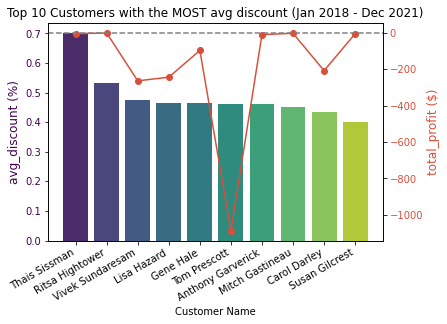

In [23]:
# top 10 customers by the avg discount given
top_10_customer = superstore.groupby(['Customer Name']).agg(avg_discount = ('Discount','mean'), total_profit = ('Profit','sum'))\
                            .sort_values(by = 'avg_discount', ascending = False)\
                            .reset_index()\
                            .head(10)
fig, ax1 = plt.subplots(figsize=(6, 4))
ax2 = ax1.twinx()
sns.barplot(data = top_10_customer, x = 'Customer Name', y = 'avg_discount', ax = ax1, palette = 'viridis') # edit
sns.lineplot(data = top_10_customer, x = 'Customer Name', y = 'total_profit', ax = ax2, color = '#D7503C') 
ax2.scatter(top_10_customer['Customer Name'], top_10_customer['total_profit'], marker = 'o', color = '#D7503C')
ax2.axhline(y = 0, color = 'gray', linestyle = '--')

ax1.set_xticklabels(top_10_customer['Customer Name'], rotation = 30, ha = 'right')
ax1.set_xlabel('Customer Name', fontsize = 10)
ax1.set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12) # edit
ax1.tick_params(axis = 'y', labelcolor = '#440154')

ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize=12)
ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
plt.title('Top 10 Customers with the MOST avg discount (Jan 2018 - Dec 2021)')              # edit
plt.show()

#### How many distinct products sold? How is their price market place distribution?

- There are 1849 products sold with the most price market place at 0.99 to 1000 USD.

,Product Name,Unit Price
2761,Maxell 4.7GB DVD-R 5/Pack,0.99
2779,Maxell 4.7GB DVD+R 5/Pack,0.99
4871,OIC Thumb-Tacks,1.14
339,"OIC Binder Clips, Mini, 1/4"" Capacity, Black",1.24
267,Bagged Rubber Bands,1.26
...,...,...
318,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.99
3151,Cubify CubeX 3D Printer Double Head Print,2999.99
2623,Canon imageCLASS 2200 Advanced Copier,3499.99
683,Cubify CubeX 3D Printer Triple Head Print,3999.99


<Figure size 432x288 with 0 Axes>

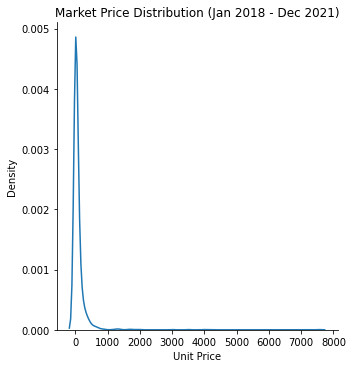

In [24]:
distinct_products = superstore[['Product Name', 'Unit Price']].drop_duplicates(subset = ['Product Name'])
display(distinct_products.sort_values('Unit Price'))
plt.figure(figsize=(6, 4))
sns.displot(data = distinct_products, x='Unit Price', kind = 'kde')
plt.title('Market Price Distribution (Jan 2018 - Dec 2021)')
plt.show()

#### Which region has the distribution of customers with the high money spent, profit, discount, and transaction?

From 50th percentile (median) of the boxplot and the box of the boxplot,
- West region has the highest total profit distribution with the lowest discount and the highest money spent (also total trx) followed by the East region
- Central region has the lowest total profit distribution with the highest discount and the lowest money spent (also total trx) followed by the South region.
- Theses 4 metrics might be associated each other. High on `total_profit` is due to low on `avg_discount`, high on`total_spend`, high on `total_trx`, otherwise. But is it correlated each other? Let's check with pearson correlation!
- We should deeply evaluate and more focus to develope the market in Central and South region of United States. These are the weakest region.

West       686
East       674
Central    629
South      512
Name: Region, dtype: int64


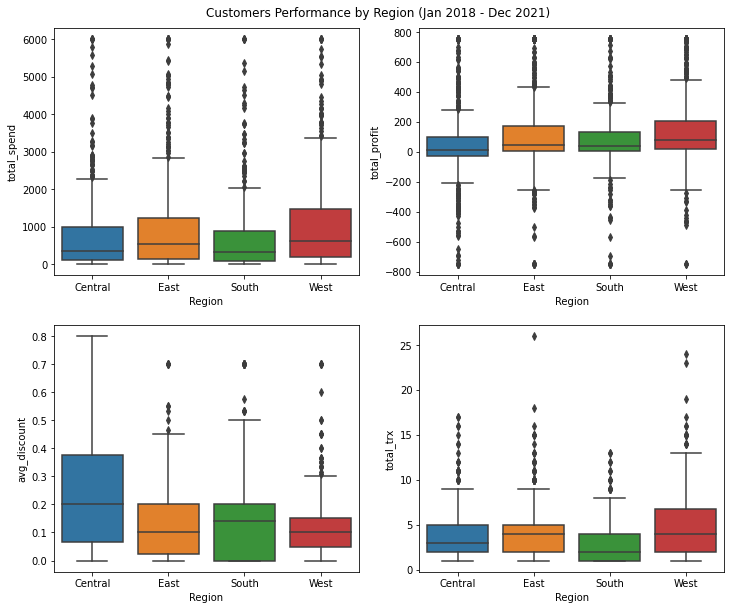

In [25]:
# create KPI based on region
fig, ax = plt.subplots(figsize = (12, 10), nrows = 2, ncols = 2)
region_profile = superstore.groupby(['Region', 'Customer Name']).agg(total_spend = ('Sales', 'sum')).reset_index()
print(region_profile['Region'].value_counts())
region_profile['total_spend'] = region_profile['total_spend'].clip(upper = 6000)
sns.boxplot(data = region_profile, x = 'Region', y = 'total_spend', ax = ax[0][0])

region_profile = superstore.groupby(['Region', 'Customer Name']).agg(total_profit = ('Profit', 'sum')).reset_index()
region_profile['total_profit'] = region_profile['total_profit'].clip(upper = 750)
region_profile['total_profit'] = region_profile['total_profit'].clip(lower = -750)
sns.boxplot(data = region_profile, x = 'Region', y = 'total_profit', ax = ax[0][1])

region_profile = superstore.groupby(['Region', 'Customer Name']).agg(avg_discount = ('Discount', 'mean')).reset_index()
sns.boxplot(data = region_profile, x = 'Region', y = 'avg_discount', ax = ax[1][0])

region_profile = superstore.groupby(['Region', 'Customer Name']).agg(total_trx = ('Order ID', 'count')).reset_index()
sns.boxplot(data = region_profile, x = 'Region', y = 'total_trx', ax = ax[1][1])
plt.suptitle('Customers Performance by Region (Jan 2018 - Dec 2021)', x = 0.5, y = 0.91)
plt.show()

#### How is the correlation between profit, sales, quantity, and discount?

- `Profit` has weak negative correlation with `Discount`.
- `Profit` has intermediate positive correlation with `Sales`.
- `Profit` has a very weak positive correlation with `Quantity`, we can ignore this.

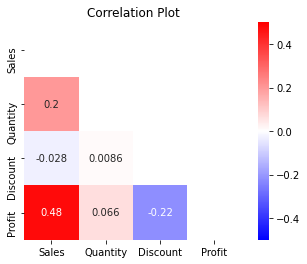

In [26]:
corr = superstore[numerical].corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask = mask, square = True, annot = True, cmap = 'bwr', vmin = -0.5, vmax = 0.5)
plt.title('Correlation Plot')
plt.show()

#### How is the monthly and yearly total profit based on number of transactions, buyers, sales, and discount over year?

- It looks like there is a seasonality trend across the year in `total_trx`, `total_buyer`, and `total_sales`. Over the year, the lowest performance was happening in January and February (beginning of the month) and the highest performance was happening in November and December (end of the month).
- The trends of `total_trx`, `total_buyer`, and `total_sales` seems increasing over year, Superstore have to prepare for the end of the month in 2022 to increase the stock of the most purchased products so understocked product would not happen.
- There is a trend where high `avg_discount` lead to low `total_profit` and otherwise.

In [27]:
# helper function
def time_series_performance(groupby, suptitle_name, df, savefig, savefig_name, figure_size = (12, 10)):
    """a function to plot KPI time series analysis group by specified "group" time of superstore dataframe "df" with title "suptitle_name"
    """
    df = df.groupby(groupby).agg(total_trx = ('Row ID', 'count'), 
                                 total_buyer = ('Customer ID', 'nunique'),
                                 total_sales = ('Sales', 'sum'),
                                 avg_discount = ('Discount', 'mean'),
                                 total_profit = ('Profit', 'sum')).reset_index()
    group = groupby[0]
    fig, ax = plt.subplots(figsize = figure_size, nrows = 4, ncols = 1)
    
    # total_trx
    ax1 = ax[0].twinx()
    sns.lineplot(data = df, x = group, y = 'total_trx', ax = ax[0], color = '#440154')
    ax[0].scatter(df[group], df['total_trx'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax1, color = '#D7503C', alpha = 0.5)
    ax1.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    ax1.axhline(y = 0, color = 'gray', linestyle = '--')
    ax1.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax1.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[0].set_ylabel('total_trx', color = '#440154', fontsize = 12)
    ax[0].tick_params(axis = 'y', labelcolor = '#440154')
    
    # total_buyer
    ax2 = ax[1].twinx()
    sns.lineplot(data = df, x = group, y = 'total_buyer', ax = ax[1], color = '#440154')
    ax[1].scatter(df[group], df['total_buyer'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax2, color = '#D7503C', alpha = 0.5)
    ax2.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    ax2.axhline(y = 0, color = 'gray', linestyle = '--')
    ax2.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax2.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[1].set_ylabel('total_buyer', color = '#440154', fontsize = 12)
    ax[1].tick_params(axis = 'y', labelcolor = '#440154')
    
    # total_sales
    ax3 = ax[2].twinx()
    sns.lineplot(data = df, x = group, y = 'total_sales', ax = ax[2], color = '#440154')
    ax[2].scatter(df[group], df['total_sales'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax3, color = '#D7503C', alpha = 0.5)
    ax3.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    ax3.axhline(y = 0, color = 'gray', linestyle = '--')
    ax3.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax3.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[2].set_ylabel('total_sales ($)', color = '#440154', fontsize = 12)
    ax[2].tick_params(axis = 'y', labelcolor = '#440154')
    
    # avg_discount
    ax4 = ax[3].twinx()
    sns.lineplot(data = df, x = group, y = 'avg_discount', ax = ax[3], color = '#440154')
    ax[3].scatter(df[group], df['avg_discount'], marker = 'x', color = '#440154', s = 30)
    sns.lineplot(data = df, x = group, y = 'total_profit', ax = ax4, color = '#D7503C', alpha = 0.5)
    ax4.scatter(df[group], df['total_profit'], marker = 'o', color = '#D7503C', s = 10, alpha = 0.5)
    plt.tight_layout()
    ax4.axhline(y = 0, color = 'gray', linestyle = '--')
    ax4.set_ylabel('total_profit ($)', color = '#D7503C', fontsize = 12)
    ax4.tick_params(axis = 'y', labelcolor = '#D7503C')
    ax[3].set_ylabel('avg_discount (%)', color = '#440154', fontsize = 12)
    ax[3].tick_params(axis = 'y', labelcolor = '#440154')

    # fig.autofmt_xdate(rotation= 30)
    plt.suptitle(t = suptitle_name, x = 0.5,y = 1.01)
    if savefig == True:
        plt.savefig(savefig_name, bbox_inches = 'tight')
    plt.show()
    return df

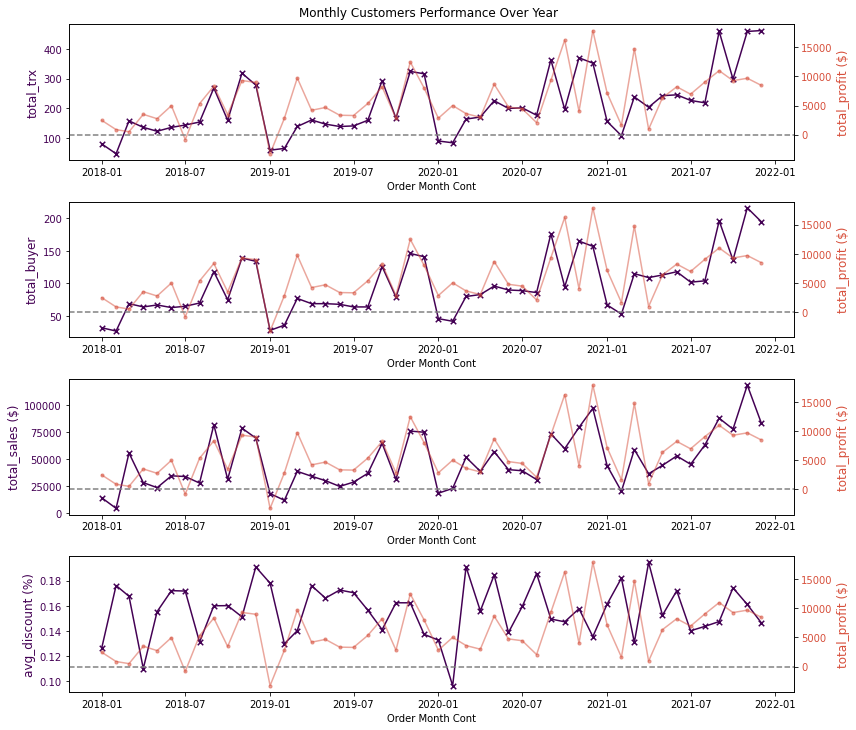

In [28]:
_ = time_series_performance(groupby = ['Order Month Cont'], 
                            suptitle_name = 'Monthly Customers Performance Over Year', 
                            df = superstore,
                            savefig = False, savefig_name = None,
                            figure_size = (12, 10))

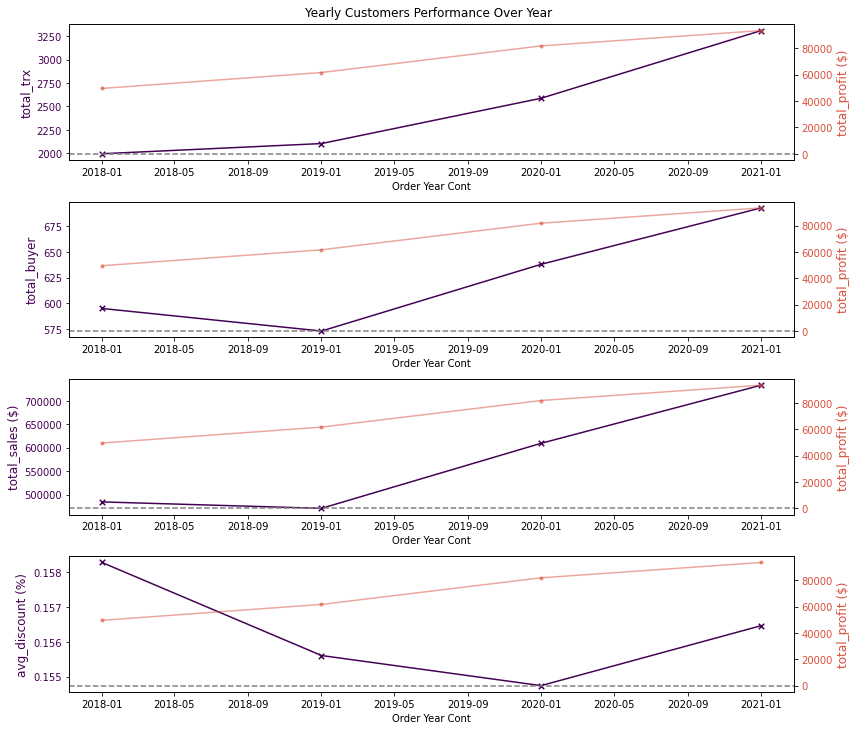

In [29]:
_ = time_series_performance(groupby = ['Order Year Cont'], 
                            suptitle_name = 'Yearly Customers Performance Over Year', 
                            df = superstore,
                            savefig = False, savefig_name = None,
                            figure_size = (12, 10))

#### How is the day of the week avg profit based on number of transactions, sales, and discount in last 2 years (2021 and 2020)?

- The performance from the last 2 years are identical where most of orders (`total_trx` or `total_buyer`) are made on Tuesday to Saturday while the least on Sunday and Monday (also the `total_sales` and `total_profit`).
- Days with low performances (Sunday and Monday) seem likely due to low `avg_discount` rate on that days.
- We should more focus on making marketing strategy to increase the order rates on Sunday and Monday.

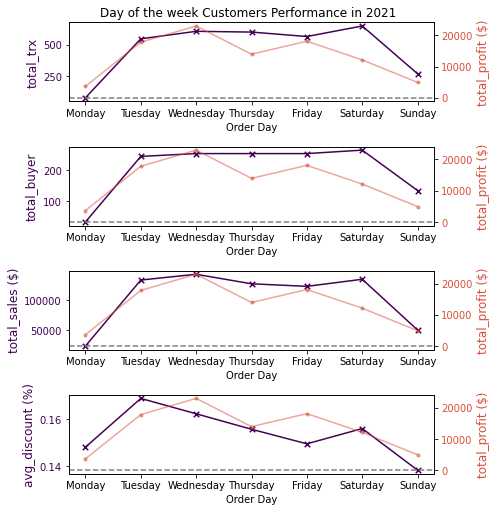

In [30]:
_ = time_series_performance(groupby = ['Order Day'], 
                            suptitle_name = 'Day of the week Customers Performance in 2021', 
                            df = superstore[superstore['Order Year'] == 2021],
                            savefig = False, savefig_name = None,
                            figure_size = (7, 7))

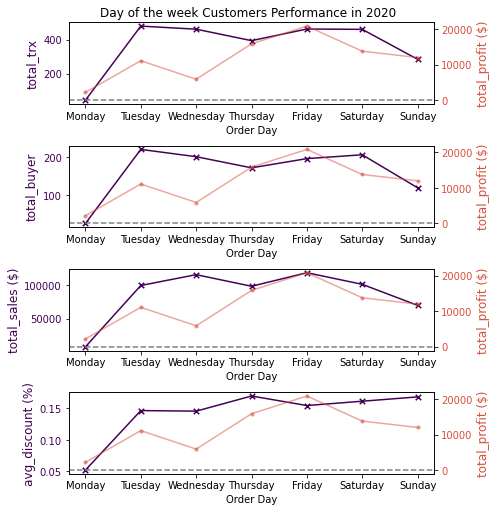

In [31]:
_ = time_series_performance(groupby = ['Order Day'], 
                            suptitle_name = 'Day of the week Customers Performance in 2020', 
                            df = superstore[superstore['Order Year'] == 2020],
                            savefig = False, savefig_name = None,
                            figure_size = (7, 7))

#### How is the monthly distribution of product quantity based on category and sub-category over year?

- Over the year, "Binders" and "Paper" are likely to be the most purchased categories every month.

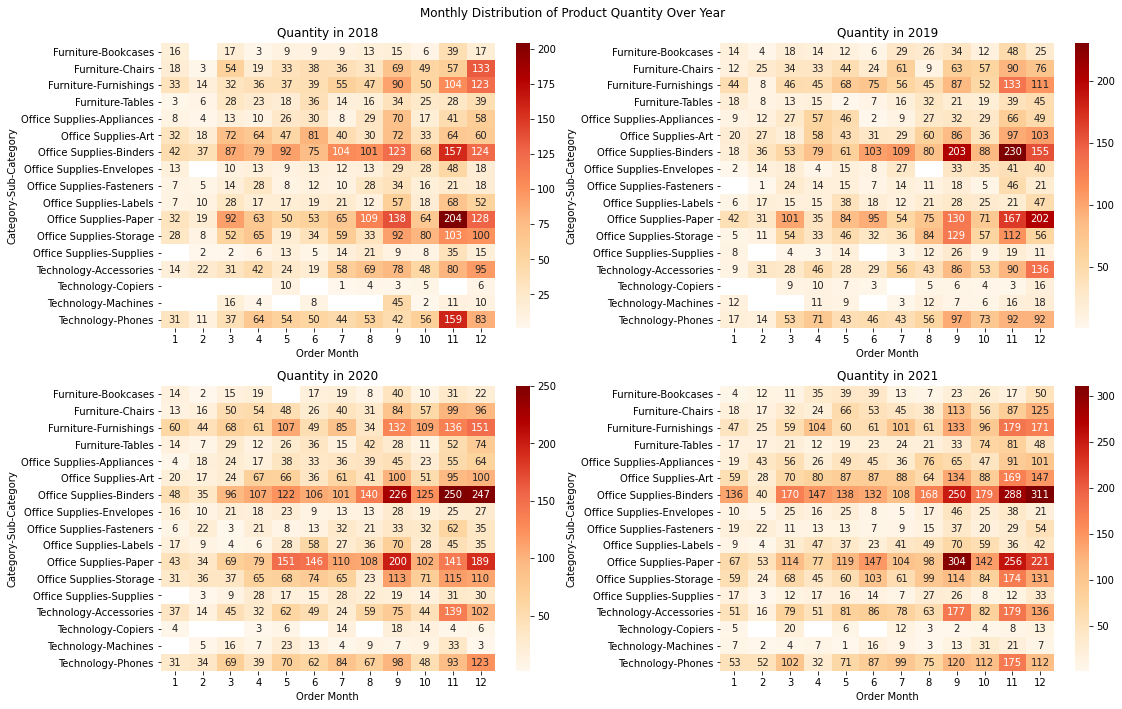

In [32]:
products_over_month = superstore.pivot_table(index = ['Order Year', 'Category', 'Sub-Category'],
                                             values = ['Quantity'],
                                             columns = ['Order Month'], aggfunc = 'sum')

# plot heatmap
fig, ax = plt.subplots(figsize = (16, 10), nrows = 2, ncols = 2)
sns.heatmap(products_over_month.loc[(2018), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[0][0])
sns.heatmap(products_over_month.loc[(2019), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[0][1])
sns.heatmap(products_over_month.loc[(2020), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[1][0])
sns.heatmap(products_over_month.loc[(2021), ('Quantity')], annot = True, cmap = 'OrRd', fmt = '.0f', 
            ax = ax[1][1])
ax[0][0].set_title('Quantity in 2018')
ax[0][1].set_title('Quantity in 2019')
ax[1][0].set_title('Quantity in 2020')
ax[1][1].set_title('Quantity in 2021')
plt.suptitle('Monthly Distribution of Product Quantity Over Year')
plt.tight_layout()
plt.show()

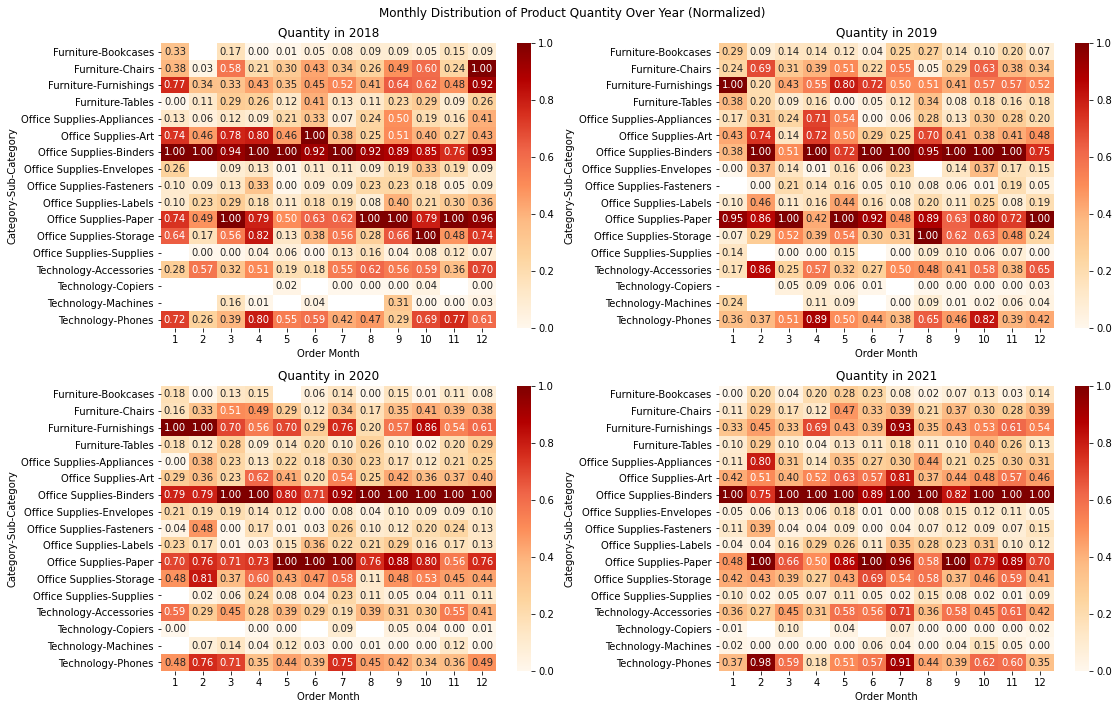

In [33]:
# normalized
normalize_2018 = (products_over_month.loc[(2018), ('Quantity')] - products_over_month.loc[(2018), ('Quantity')].min()) / \
                 (products_over_month.loc[(2018), ('Quantity')].max() - products_over_month.loc[(2018), ('Quantity')].min())

normalize_2019 = (products_over_month.loc[(2019), ('Quantity')] - products_over_month.loc[(2019), ('Quantity')].min()) / \
                 (products_over_month.loc[(2019), ('Quantity')].max() - products_over_month.loc[(2019), ('Quantity')].min())

normalize_2020 = (products_over_month.loc[(2020), ('Quantity')] - products_over_month.loc[(2020), ('Quantity')].min()) / \
                 (products_over_month.loc[(2020), ('Quantity')].max() - products_over_month.loc[(2020), ('Quantity')].min())

normalize_2021 = (products_over_month.loc[(2021), ('Quantity')] - products_over_month.loc[(2021), ('Quantity')].min()) / \
                 (products_over_month.loc[(2021), ('Quantity')].max() - products_over_month.loc[(2021), ('Quantity')].min())

# plot heatmap
fig, ax = plt.subplots(figsize = (16, 10), nrows = 2, ncols = 2)
sns.heatmap(normalize_2018, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[0][0])
sns.heatmap(normalize_2019, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[0][1])
sns.heatmap(normalize_2020, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[1][0])
sns.heatmap(normalize_2021, annot = True, cmap = 'OrRd', fmt = '.2f', 
            ax = ax[1][1])
ax[0][0].set_title('Quantity in 2018')
ax[0][1].set_title('Quantity in 2019')
ax[1][0].set_title('Quantity in 2020')
ax[1][1].set_title('Quantity in 2021')
plt.suptitle('Monthly Distribution of Product Quantity Over Year (Normalized)')
plt.tight_layout()
plt.show()

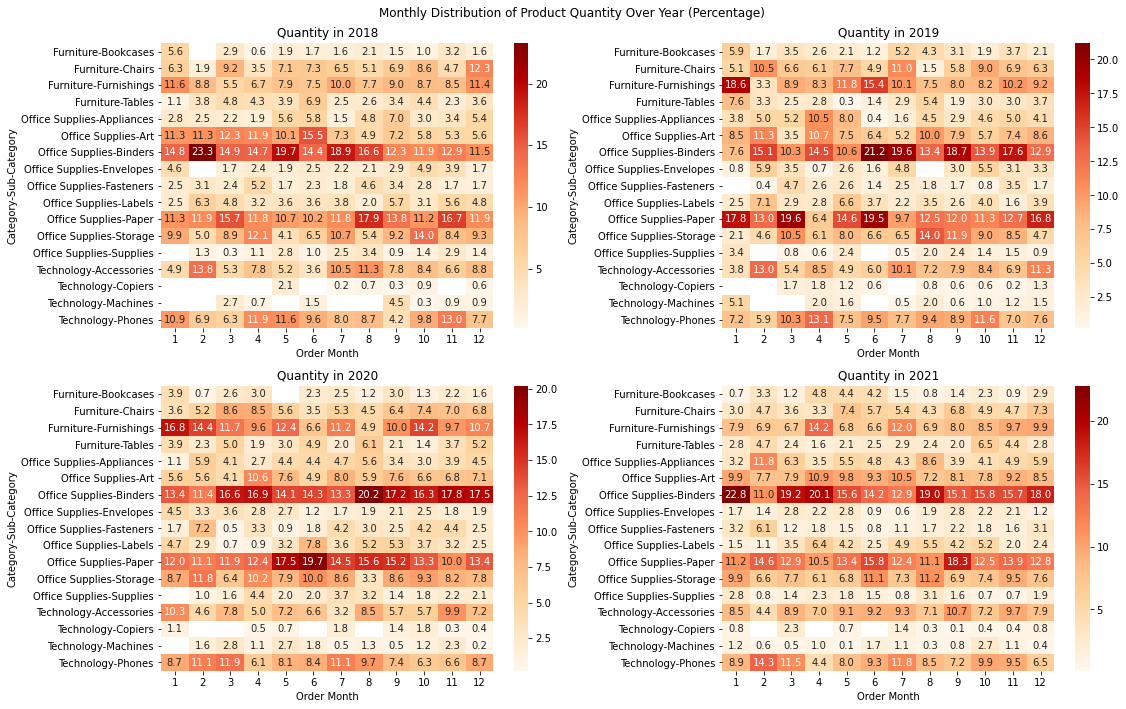

In [34]:
# percentage
percentage_2018 = products_over_month.loc[(2018), ('Quantity')]/products_over_month.loc[(2018), ('Quantity')].sum()*100

percentage_2019 = products_over_month.loc[(2019), ('Quantity')]/products_over_month.loc[(2019), ('Quantity')].sum()*100

percentage_2020 = products_over_month.loc[(2020), ('Quantity')]/products_over_month.loc[(2020), ('Quantity')].sum()*100

percentage_2021 = products_over_month.loc[(2021), ('Quantity')]/products_over_month.loc[(2021), ('Quantity')].sum()*100

# plot heatmap
fig, ax = plt.subplots(figsize = (16, 10), nrows = 2, ncols = 2)
sns.heatmap(percentage_2018, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[0][0])
sns.heatmap(percentage_2019, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[0][1])
sns.heatmap(percentage_2020, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[1][0])
sns.heatmap(percentage_2021, annot = True, cmap = 'OrRd', fmt = '.1f', 
            ax = ax[1][1])
ax[0][0].set_title('Quantity in 2018')
ax[0][1].set_title('Quantity in 2019')
ax[1][0].set_title('Quantity in 2020')
ax[1][1].set_title('Quantity in 2021')
plt.suptitle('Monthly Distribution of Product Quantity Over Year (Percentage)')
plt.tight_layout()
plt.show()

#### What are the products with the highest demand based on category and sub-category at the end of the month in last 2 years (Nov & Dec 2021 and 2020)?

- From the last 2 years, Sub-categories which consistently have the highest demand in November & December are "Binders", "Paper", and "Furnishings". Interestingly, "Art" took the 4th place in 2021 while in 2020 took the 7th place. 
- Superstore has to ensure that these sub-categories of products are always well-stocked at the end of the year since the highest transactions would occur there in the next year.

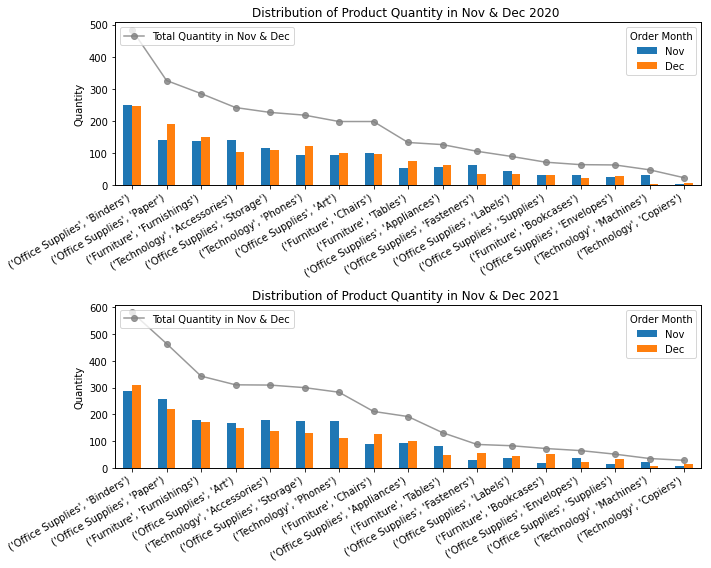

In [35]:
products_over_month = superstore.pivot_table(index = ['Order Year', 'Category', 'Sub-Category'],
                                             values = ['Quantity'],
                                             columns = ['Order Month'], aggfunc = 'sum')

fig, ax = plt.subplots(figsize = (10, 8), nrows = 2, ncols = 1)
i = 0
for year in [2020, 2021]:
    # prepare the data
    temp_df1 = products_over_month.loc[year, ('Quantity', [11, 12])]['Quantity']
    temp_df2 = temp_df1.sum(axis = 1).sort_values(ascending = False)
    temp_df1 = temp_df1.loc[temp_df2.index]
    
    # plot the data
    temp_twinx = ax[i].twinx()
    temp_df1.plot(kind = 'bar', ax = ax[i])
    temp_df2.plot(kind = 'line', ax = temp_twinx, 
                  label = 'Total Quantity in Nov & Dec', color = 'gray', alpha = 0.8, marker = 'o')
    
    # misc
    ax[i].set_xticklabels(temp_df1.index, rotation = 30, ha = 'right')
    ax[i].set_title('Distribution of Product Quantity in Nov & Dec {} '.format(year))
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Quantity')
    ax[i].set_ylim([0, temp_df2.max()+10])
    temp_twinx.get_yaxis().set_ticks([])
    temp_twinx.legend(loc = 'upper left')
    ax[i].legend(labels = ['Nov', 'Dec'], title = 'Order Month')
    
    i += 1
plt.tight_layout()
plt.show()

### Main question: What is the main driver of loss?

#### Profit vs Discount

From the previous analysis, it seems like the main driver of loss is due to high discount rate given to the customers. Let's check how discount given could affect the loss and profit in Superstore.

In [36]:
# create profit status and loss status columns
superstore['Profit Status'] = superstore['Profit'].apply(lambda x: 1 if x > 0 else 0)
superstore['Loss Status'] = superstore['Profit'].apply(lambda x: 1 if x <= 0 else 0)

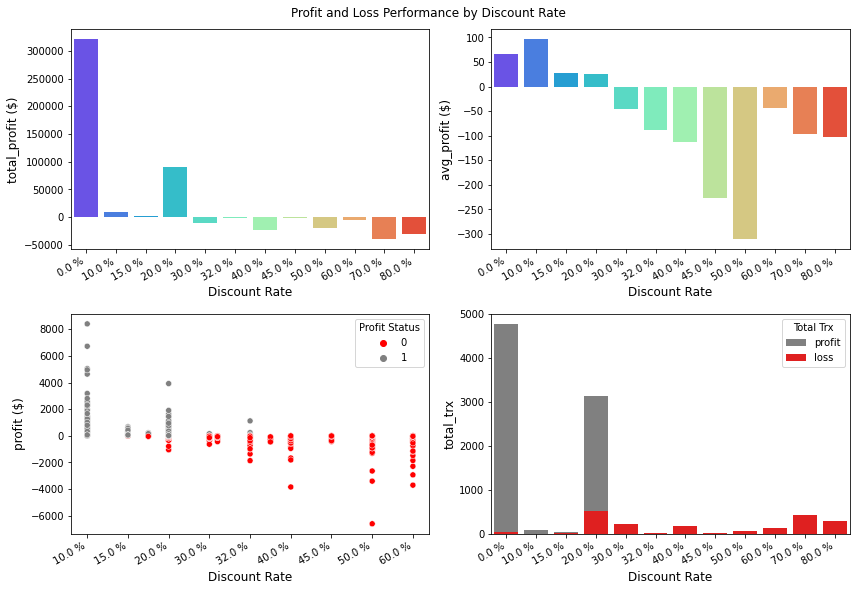

In [37]:
df = superstore.groupby('Discount').agg(total_profit = ('Profit', 'sum'),
                                        avg_profit = ('Profit', 'mean'),
                                        total_profit_trx = ('Profit Status', 'sum'),
                                        total_loss_trx = ('Loss Status', 'sum'))
df = df.reset_index()
df['Discount'] = df['Discount'].apply(lambda x: str(x*100) + ' %')

fig, ax = plt.subplots(figsize = (12, 8), ncols = 2, nrows = 2)

sns.barplot(data = df, x = 'Discount', y = 'total_profit', ax = ax[0][0], palette = 'rainbow')
sns.barplot(data = df, x = 'Discount', y = 'avg_profit', ax = ax[0][1], palette = 'rainbow')
sns.scatterplot(data = superstore, x = 'Discount', y = 'Profit', hue = 'Profit Status', ax = ax[1][0], palette = ['red', 'gray'])
sns.barplot(data = df, x = 'Discount', y = 'total_profit_trx', ax = ax[1][1], color = 'gray', label = 'profit')
sns.barplot(data = df, x = 'Discount', y = 'total_loss_trx', ax = ax[1][1], color = 'red', label = 'loss')

ax[0][0].set_ylabel('total_profit ($)', fontsize = 12); ax[0][1].set_ylabel('avg_profit ($)', fontsize = 12)
ax[1][0].set_ylabel('profit ($)', fontsize = 12); ax[1][1].set_ylabel('total_trx', fontsize = 12)

ax[0][0].set_xlabel('Discount Rate', fontsize = 12); ax[0][1].set_xlabel('Discount Rate', fontsize = 12)
ax[1][0].set_xlabel('Discount Rate', fontsize = 12); ax[1][1].set_xlabel('Discount Rate', fontsize = 12)

ax[0][0].set_xticklabels(df['Discount'], rotation = 30, ha = 'right'); ax[0][1].set_xticklabels(df['Discount'], rotation = 30, ha = 'right')
ax[1][0].set_xticklabels(df['Discount'], rotation = 30, ha = 'right'); ax[1][1].set_xticklabels(df['Discount'], rotation = 30, ha = 'right')

ax[1][1].legend(title = 'Total Trx')
plt.tight_layout()
plt.suptitle('Profit and Loss Performance by Discount Rate', x = 0.5, y = 1.02, fontsize = 12)
plt.show()

- It looks like `Discount` is the main driver of loss.
- High discount given for a transaction lead to high negative profit (high loss).
- The discount threshold should be about 20%.
- Normal place has high profit `total_profit`.

#### Profit and Loss profile

Let's see how is the distribution of the transactions at profit and loss state across `Region`, `Category`, and `Sub-Category` using pieplot and countplot to identify which region is the weakest and makes more loss.

Insights:
- `Region`: Proportion of loss status more occurs in "Central" and "East" region while profit in "West" and "East" region.
- `Category`: Proportion of loss status more occurs on "Furniture" category while profit on "Office Supplies".
- `Sub-Category`: Large loss proportion occurs on "Binder", "Chairs", "Tables", and "Bookcases" (total trx of loss more than 75% of total trx of profit). Interestingly, "Binders" has the highest proportion of loss and on the other hand it has the highest `avg_discount` too compared to other `Sub-Category`. This is the main driver of high loss porportion on "Binders".

In [38]:
# features to analyze
# features = ['Ship Mode', 'Segment', 'Region', 'Category', 'Sub-Category', 'Quantity', 'Discount', 
#             'Returned', 'Order Year', 'Order Month', 'Order Day', 'Order Weekend/Weekday', 'Punctuality']
features = ['Region', 'Category', 'Sub-Category']

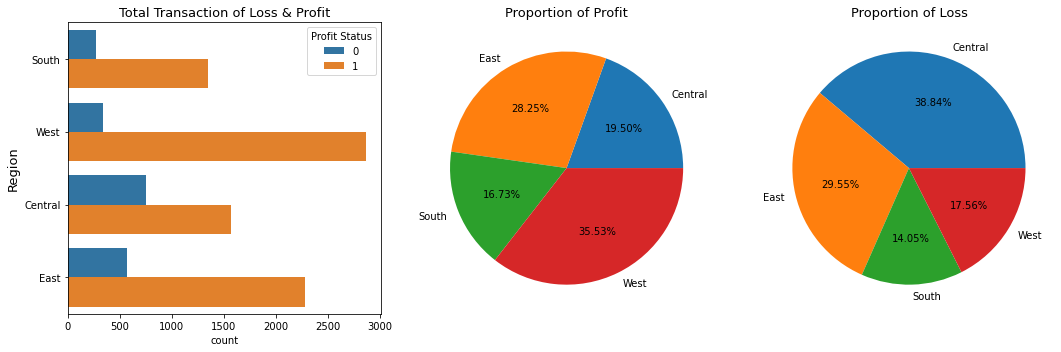

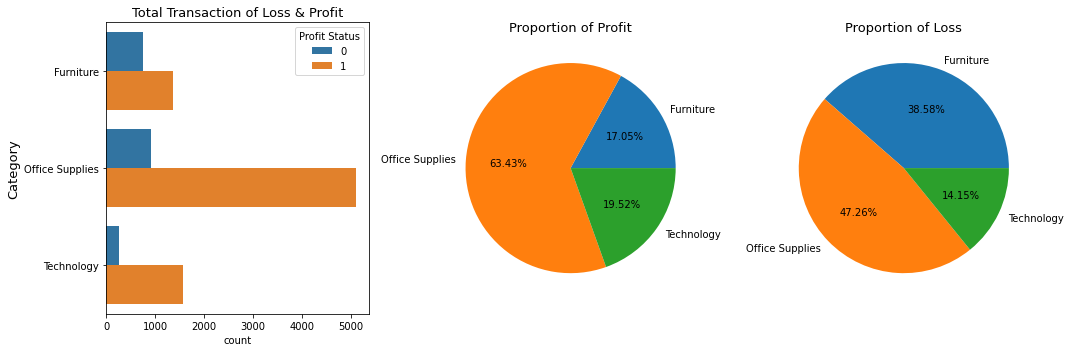

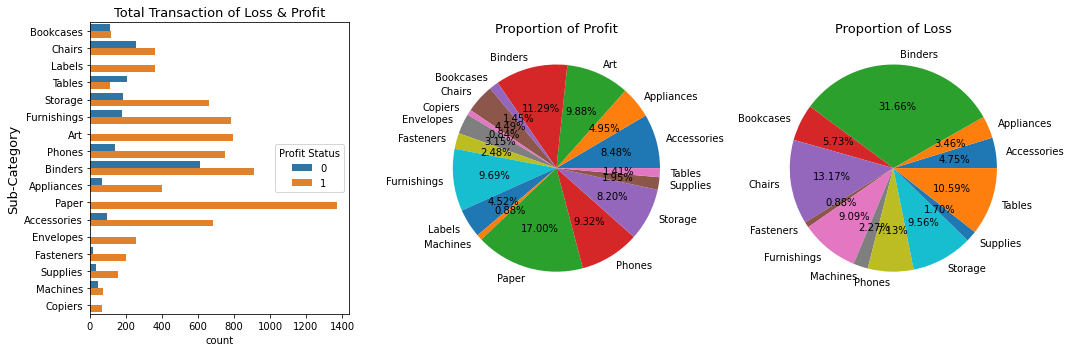

In [39]:
for col in superstore[features].columns:
    fig, ax = plt.subplots(figsize = (15, 5), ncols = 3, nrows = 1)
    
    # plot 1: countplot
    sns.countplot(data = superstore, y = superstore[col], hue = 'Profit Status', ax = ax[0])
    ax[0].set_title('Total Transaction of Loss & Profit', loc = 'center', fontsize = 13)
    ax[0].set_ylabel(str(col), fontsize = 13)
    
    # plot 2: proportion of profit
    _ = superstore[superstore['Profit Status'] == 1]
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[1])
    ax[1].set(xlabel = None, ylabel = None)
    ax[1].set_title('Proportion of Profit', loc = 'center', fontsize = 13)
    
    # plot 3: proportion of loss
    _ = superstore[superstore['Profit Status'] == 0]
    _.groupby([col]).size().plot(kind = 'pie', autopct = '%.2f%%', ax = ax[2])
    ax[2].set(xlabel = None, ylabel = None)
    ax[2].set_title('Proportion of Loss', loc = 'center', fontsize = 13)
    
    plt.tight_layout()
    plt.show()

####  "Binder", "Chairs", "Tables", and "Bookcases" performances for each region

In [40]:
def percentage(x):
    return np.sum(x)/np.size(x)
df = superstore.groupby(['Region', 'Sub-Category']).agg(total_profit = ('Profit', 'sum'),
                                                        avg_discount = ('Discount', 'mean'),
                                                        percentage_of_loss = ('Loss Status', percentage),
                                                        percentage_of_profit = ('Profit Status', percentage))
df = df.reset_index()
analyze_sub_category = ['Binders', 'Chairs', 'Tables', 'Bookcases']
df = df[df['Sub-Category'].isin(analyze_sub_category)]
loss_profit_df = df.pivot_table(index = 'Sub-Category', columns = ['Region'], values = ['percentage_of_loss', 'percentage_of_profit'])

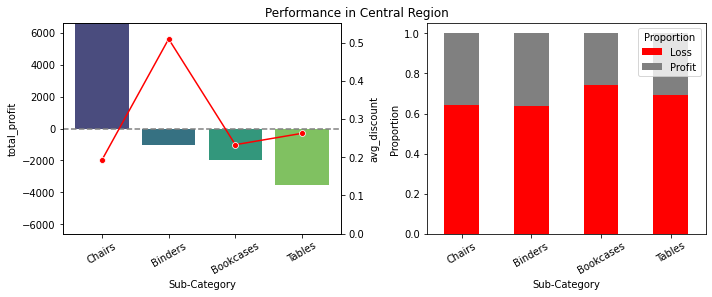

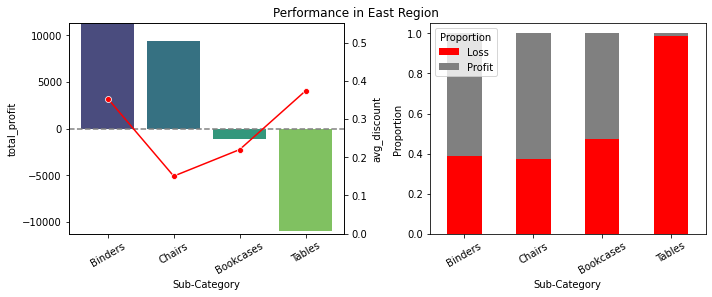

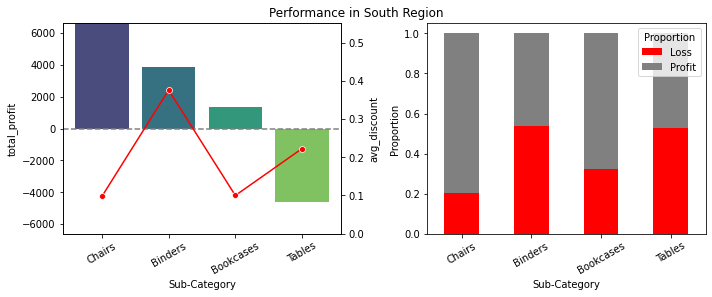

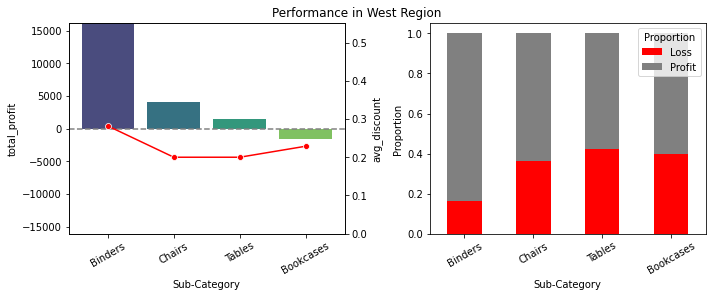

In [41]:
regions = ['Central', 'East', 'South', 'West']
for region in regions:
    fig, ax = plt.subplots(figsize = (10, 4), ncols = 2, nrows = 1)
    
    # left-side plot
    ax1 = ax[0].twinx()
    region_df = df[df['Region'] == region].sort_values('total_profit', ascending = False)
    sns.barplot(data = region_df, x = 'Sub-Category', y = 'total_profit', ax = ax[0], palette = 'viridis', order = region_df['Sub-Category'])              
    sns.lineplot(data = region_df, x = 'Sub-Category', y = 'avg_discount', ax = ax1, color = 'red', marker = 'o')     
    ax[0].axhline(y = 0, color = 'gray', linestyle = '--')
    ax[0].set_ylim([-1*region_df['total_profit'].max(), 1*region_df['total_profit'].max()])
    ax1.set_ylim([0.0, 0.55])
    ax[0].set_xticklabels(region_df['Sub-Category'], rotation = 30)
    
    # right-side plot
    percentage_df = pd.concat([loss_profit_df['percentage_of_loss'][[region]],
                               loss_profit_df['percentage_of_profit'][[region]]], axis = 1).loc[region_df['Sub-Category']]
    percentage_df.plot(kind = 'bar', stacked = True, ax = ax[1], color = ['red', 'gray'])
    ax[1].legend(['Loss', 'Profit'], title = 'Proportion')
    ax[1].set_xticklabels(region_df['Sub-Category'], rotation = 30)
    ax[1].set_ylabel('Proportion')
    
    plt.tight_layout()
    plt.suptitle('Performance in {} Region'.format(region), y = 1.02)
    plt.show()

Insights:
- There are more than 50% of loss on "Binders", "Chairs", "Tables", and "Bookcases" in "Central" region. This is the weakest region to sell "Binders" then followed by "South" region. The average discount given is too high (up to 50%).
- Almost 99% of loss occurs on selling "Tables" in "East" region and this is also due to the highest avg discount given compared to other region.
- "West" region is more profitable because the discount regulation is smaller.
- Mostly, high loss on transactions are due to very high discount given.

In [42]:
# save 'superstore' dataframe as excel file
superstore.to_excel('dataset/superstore_cleaned.xlsx')